In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [4]:
lead_df=pd.read_csv("Leads.csv")

In [5]:
lead_df.head()

Prospect ID  Lead Number              Lead Origin     Lead Source Do Not Email Do Not Call  Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit            Last Activity Country           Specialization How did you hear about X Education What is your current occupation What matters most to you in choosing a course Search Magazine Newspaper Article X Education Forums Newspaper Digital Advertisement Through Recommendations Receive More Updates About Our Courses                                 Tags      Lead Quality Update me on Supply Chain Content Get updates on DM Content    Lead Profile    City Asymmetrique Activity Index Asymmetrique Profile Index  Asymmetrique Activity Score  Asymmetrique Profile Score I agree to pay the amount through cheque A free copy of Mastering The Interview Last Notable Activity
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API      Olark Chat           No          No          0          0.0                            0                   0.0  Page Visited on Website     NaN                   Select                             Select                      Unemployed                       Better Career Prospects     No       No                No                 No        No                    No                      No                                     No          Interested in other courses  Low in Relevance                                No                        No          Select  Select                   02.Medium                  02.Medium                         15.0                        15.0                                       No                                     No              Modified
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API  Organic Search           No          No          0          5.0                          674                   2.5             Email Opened   India                   Select                             Select                      Unemployed                       Better Career Prospects     No       No                No                 No        No                    No                      No                                     No                              Ringing               NaN                                No                        No          Select  Select                   02.Medium                  02.Medium                         15.0                        15.0                                       No                                     No          Email Opened
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission  Direct Traffic           No          No          1          2.0                         1532                   2.0             Email Opened   India  Business Administration                             Select                         Student                       Better Career Prospects     No       No                No                 No        No                    No                      No                                     No  Will revert after reading the email          Might be                                No                        No  Potential Lead  Mumbai                   02.Medium                    01.High                         14.0                        20.0                                       No                                    Yes          Email Opened
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission  Direct Traffic           No          No          0          1.0                          305                   1.0              Unreachable   India    Media and Advertising                      Word Of Mouth                      Unemployed                       Better Career Prospects     No       No                No                 No        No                    No                      No                                     No                              Ringing          Not S

In [6]:
#Checking dimension of dataset :-

lead_df.shape

(9240, 37)

In [7]:
#Checking column wise info:-

lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [8]:
#Checking statistical summary of dataset:-

lead_df.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  Asymmetrique Activity Score  Asymmetrique Profile Score
count    9240.000000  9240.000000  9103.000000                  9240.000000           9103.000000                  5022.000000                 5022.000000
mean   617188.435606     0.385390     3.445238                   487.698268              2.362820                    14.306252                   16.344883
std     23405.995698     0.486714     4.854853                   548.021466              2.161418                     1.386694                    1.811395
min    579533.000000     0.000000     0.000000                     0.000000              0.000000                     7.000000                   11.000000
25%    596484.500000     0.000000     1.000000                    12.000000              1.000000                    14.000000                   15.000000
50%    615479.000000     0.000000     3.000000                   248.000000              2.000000                    14.000000                   16.000000
75%    637387.250000     1.000000     5.000000                   936.000000              3.000000                    15.000000                   18.000000
max    660737.000000     1.000000   251.000000                  2272.000000             55.000000                    18.000000                   20.000000

# observation
From above statistical summary we can see that column 'TotalVisits','Total Time Spent on Website','Page Views Per Visit' having outliers ,cause there is significant difference between min and max values.We will verify it later by using EDA.

# Step 2: Data Quality Check and Cleaning

In [9]:
# Checking datatype of columns:-

lead_df.dtypes

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                       

# Observation
- Total 7 numeric columns ( Lead Number,Asymmetrique Activity Score, Asymmetrique Profile Score, Converted TotalVisits,Total Time Spent on Website, Page Views Per Visit) and 30 categorical columns.
- None of the columns have inconsistent datatype, hence no conversion is required.

In [10]:
# Checking for duplicates and dropping the entire duplicate row if any:-

lead_df.drop_duplicates(subset=None, inplace=True)

In [11]:
# Checking shape after dropping duplicates:-
lead_df.shape

(9240, 37)

no duplicate values found

# Finding which columns having level 'Select'

In [12]:
cols=list(lead_df.columns)
for i in cols:
    if 'Select' in lead_df[i].values:
        print(i)

Specialization
How did you hear about X Education
Lead Profile
City


We found that column 'Specialization','How did you hear about X Education','Lead Profile' and 'City' having 'Select' level.Which means the customer had not selected option while filling form.So it is better to impute will 'Null' values.

In [13]:
# Imputing 'Select' with NaN'  :-

lead_df = lead_df.replace('Select', np.nan)

In [14]:
# After 'NaN' imputation Checking 'Select' level is available or not:-

cols=list(lead_df.columns)
for i in cols:
    if 'Select' in lead_df[i].values:
        print(i)

# Checking Null/Missing values

In [15]:
# Checking null values column wise:-

lead_df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [16]:
#Checking percentage of missing/null values :-

round(100*(lead_df.isnull().sum()/len(lead_df)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

Note:-Lead Quality (~51%), Tags, Asymmetrique scores ,Profile and Last Notable Activity are created by the sales team after contacting the leads so we can drop these columns.

For rest of the columns we will do analysis wheather we will drop it or not.


 missing value ~45%
1. Asymmetrique Activity Index
2. Asymmetrique Profile Index
3. Asymmetrique Activity Score
4. Asymmetrique Profile Score

# Missing Value Treatment 

Dropping Columns having missing values more than 30%

In [17]:
# Listing all the columns having more than 30% missing values into 'missing_columns':-

missing_columns_30 = lead_df.columns[100*(lead_df.isnull().sum()/len(lead_df)) > 30]
print(missing_columns_30)

Index(['Specialization', 'How did you hear about X Education', 'Tags', 'Lead Quality', 'Lead Profile', 'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score'], dtype='object')


In [18]:
miss_col=missing_columns_30.drop('Specialization')

# we are creating duplicate of original dataframe as it remains unaffected

In [19]:
# Creating copy of original datarframe :-

lead_df1=lead_df.copy()

In [20]:
# Droping the columns having more than 30% missing values:-

lead_df1 = lead_df1.drop(miss_col, axis=1).copy()

In [21]:
# Checking dimension after dropping columns:-

lead_df1.shape

(9240, 28)

In [22]:
# Checking the remaining columns for missing values:-

round(100*(lead_df1.isnull().sum()/len(lead_df1)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [23]:
# Plotting count plot of 'Specialization' to see the data distribution:-

#plt.figure(figsize=(15,5))
#sns.countplot(lead_df1['Specialization'])
#plt.xticks(rotation=90)
#plt.show()
# if not worked properly use below one


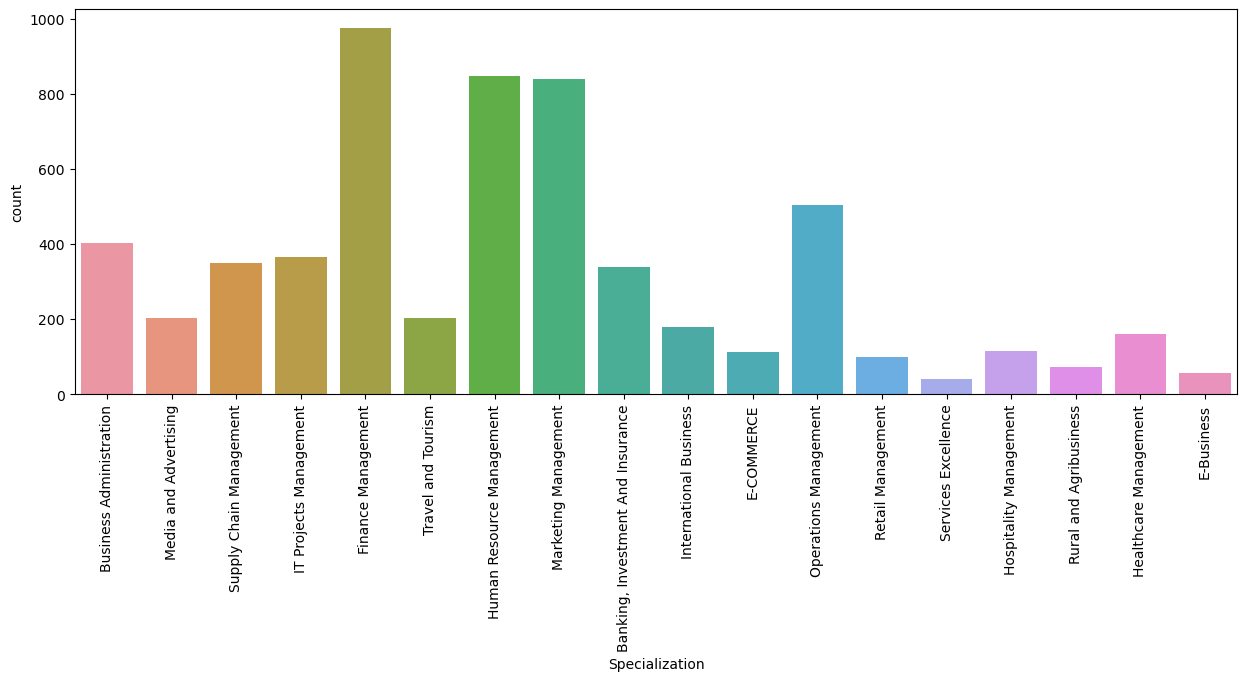

In [24]:
plt.figure(figsize=(15, 5)) 
sns.countplot(x='Specialization', data=lead_df1) 
plt.xticks(rotation=90) 
plt.show()

In [25]:
# Imputing missing value with 'Other' :-

lead_df1['Specialization'].fillna('Other',inplace=True)

Analyzing columns with missing values less than 30%

In [26]:
# Listing all the columns having missing values into 'remaining_missing':-

remaining_missing = lead_df1.columns[(100*(lead_df1.isnull().sum()/len(lead_df1)) < 30) & (100*(lead_df1.isnull().sum()/len(lead_df1)) >0) ]
print(remaining_missing)

Index(['Lead Source', 'TotalVisits', 'Page Views Per Visit', 'Last Activity', 'Country', 'What is your current occupation', 'What matters most to you in choosing a course'], dtype='object')


In [27]:
# Checking value counts of 'What is your current occupation' variable:-

lead_df1['What is your current occupation'].value_counts()

What is your current occupation
Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

In [28]:
# Plotting count plot to check data counts in column 'What is your current occupation':-

#plt.figure(figsize=(15,5))
#sns.countplot(lead_df1['What is your current occupation'])
#plt.show()
#if not working use below one

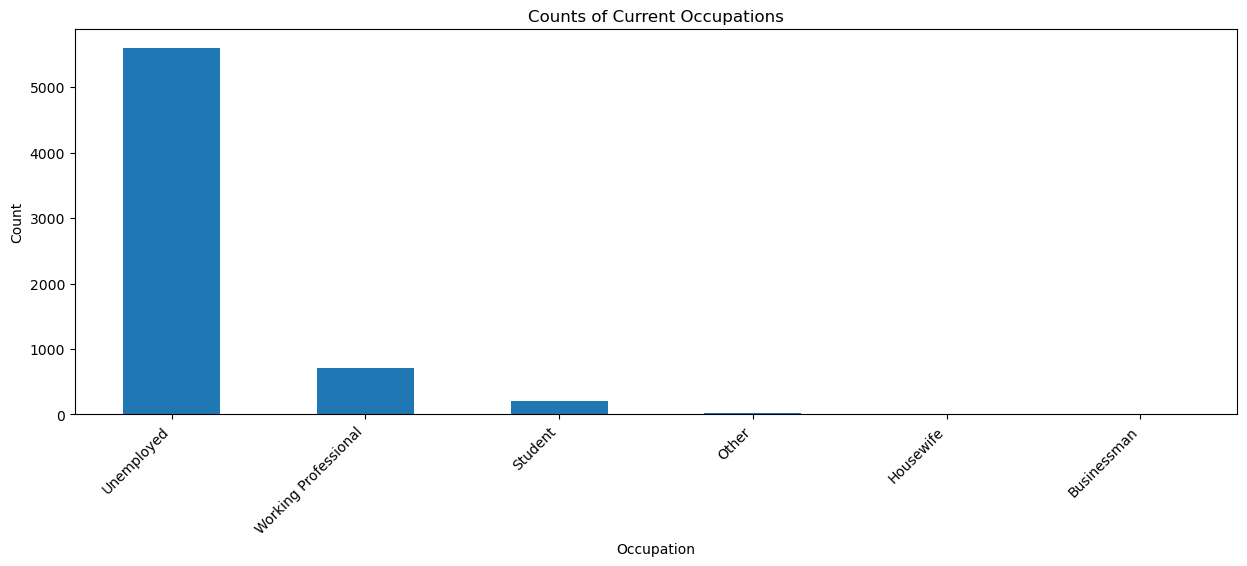

In [29]:
# Plotting count plot to check data counts in column 'What is your current occupation':-

occupation_counts = lead_df1['What is your current occupation'].value_counts()

plt.figure(figsize=(15, 5))
occupation_counts.plot(kind='bar')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.title('Counts of Current Occupations')
plt.xticks(rotation=45, ha='right')
plt.show()

In [30]:
# Imputing missing value with 'Other' :-

lead_df1['What is your current occupation'].fillna('Other',inplace=True)

Count of 'Other': 2706


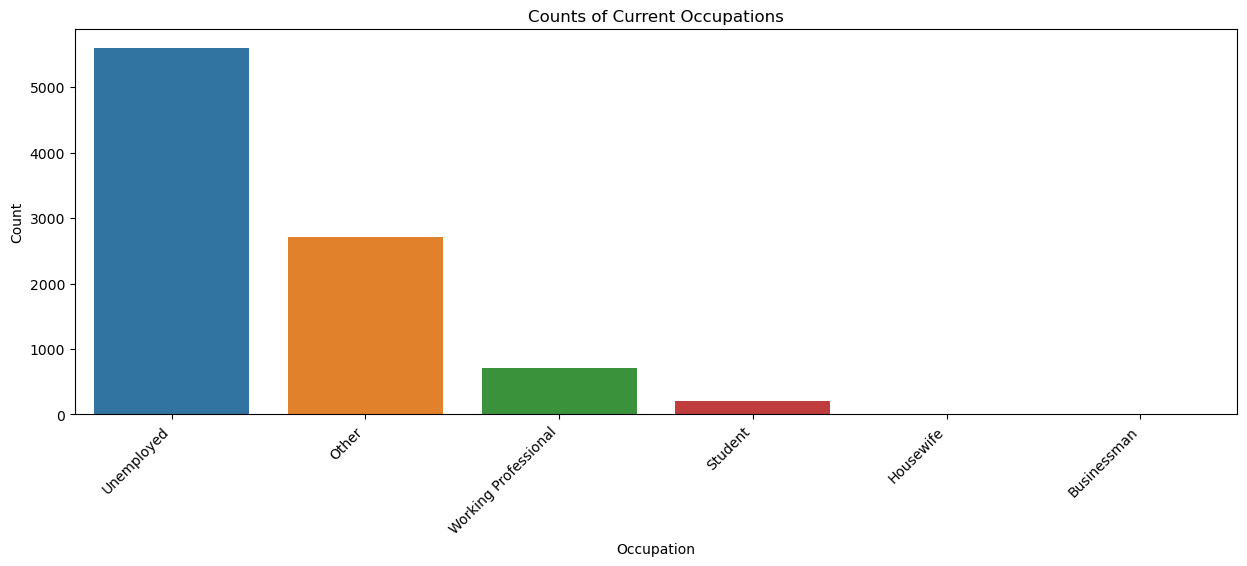

In [31]:
# Assuming lead_df1 is your DataFrame
occupation_counts = lead_df1['What is your current occupation'].value_counts()

# Display the count of 'Other'
other_count = occupation_counts.get('Other', 0)
print(f"Count of 'Other': {other_count}")

# Plot the counts
plt.figure(figsize=(15, 5))
sns.countplot(x=lead_df1['What is your current occupation'], order=occupation_counts.index)
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.title('Counts of Current Occupations')
plt.xticks(rotation=45, ha='right')
plt.show()

In [32]:
# Checking value count of 'What matters most to you in choosing a course' variable:-

lead_df1['What matters most to you in choosing a course'].value_counts(normalize=True)*100

What matters most to you in choosing a course
Better Career Prospects      99.954065
Flexibility & Convenience     0.030623
Other                         0.015312
Name: proportion, dtype: float64

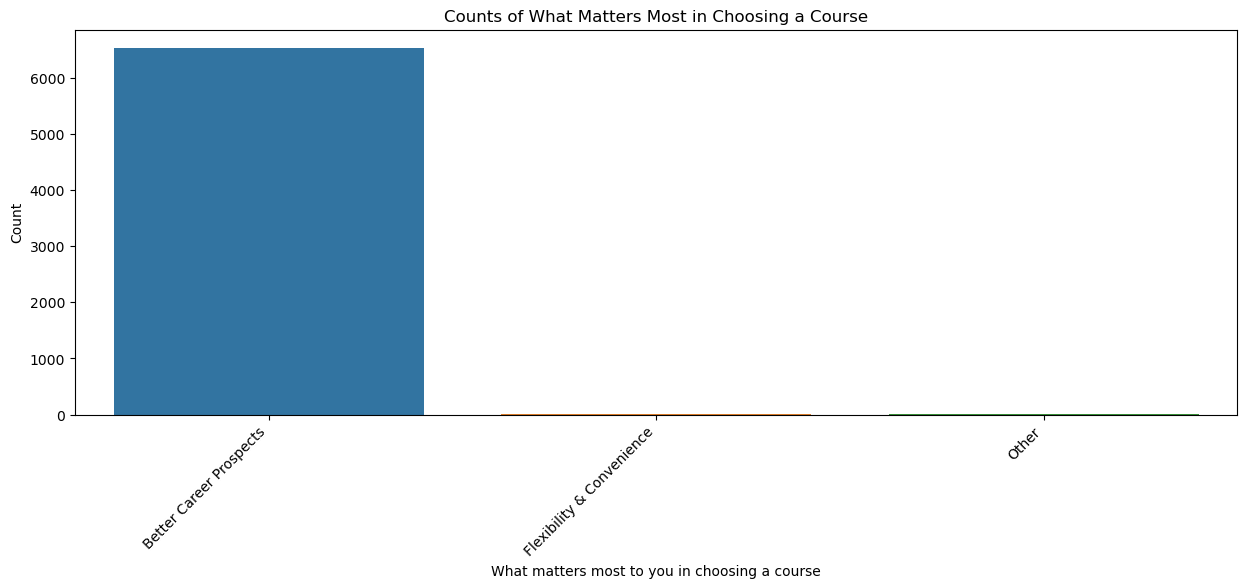

In [33]:
# Verifying counts by ploting count plot:-

plt.figure(figsize=(15, 5))
sns.countplot(data=lead_df1, x='What matters most to you in choosing a course')
plt.xlabel('What matters most to you in choosing a course')
plt.ylabel('Count')
plt.title('Counts of What Matters Most in Choosing a Course')
plt.xticks(rotation=45, ha='right')
plt.show()

In [34]:
# Checking value counts of 'Country' column:-

lead_df1.Country.value_counts()

Country
India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malays

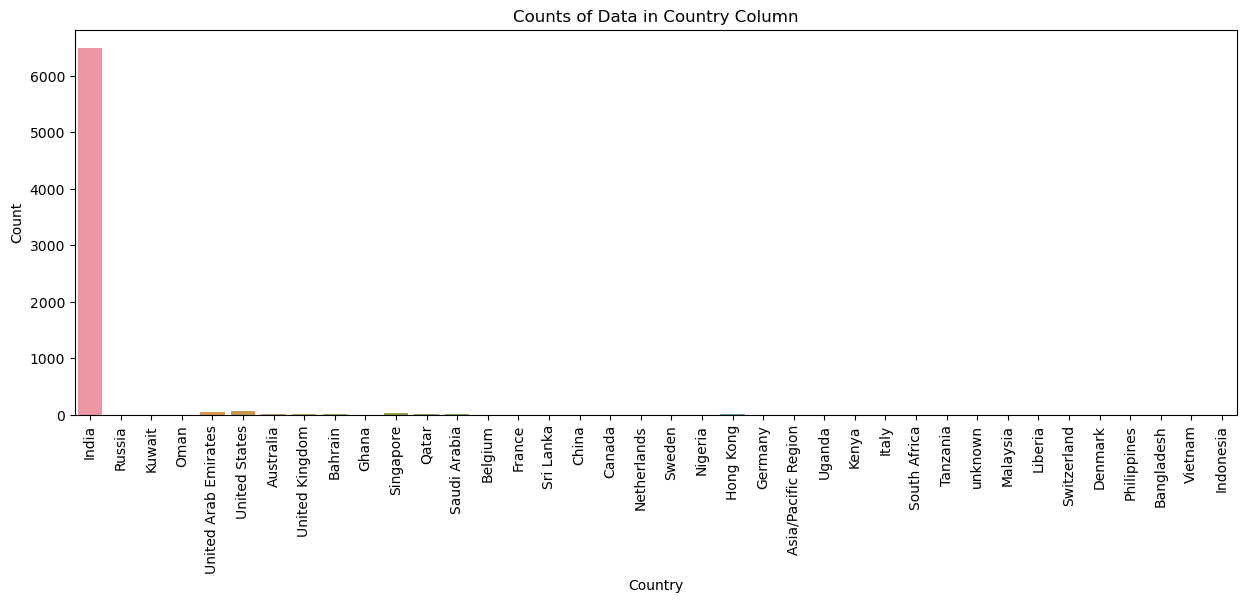

In [35]:
# Plotting count plot to visualize counts of data of 'Country' column:-

plt.figure(figsize=(15, 5))
sns.countplot(data=lead_df1, x='Country')
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Counts of Data in Country Column')
plt.show()

# Observation
From count plot we can see that 'India' count is highest so we can impute missing values with 'India'

In [36]:
# Replacing missing values with most frequent value 'India' in categorical column 'Country':-

lead_df1.Country.fillna('India',inplace=True)

In [37]:
lead_df1.Country.value_counts()

Country
India                   8953
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malays

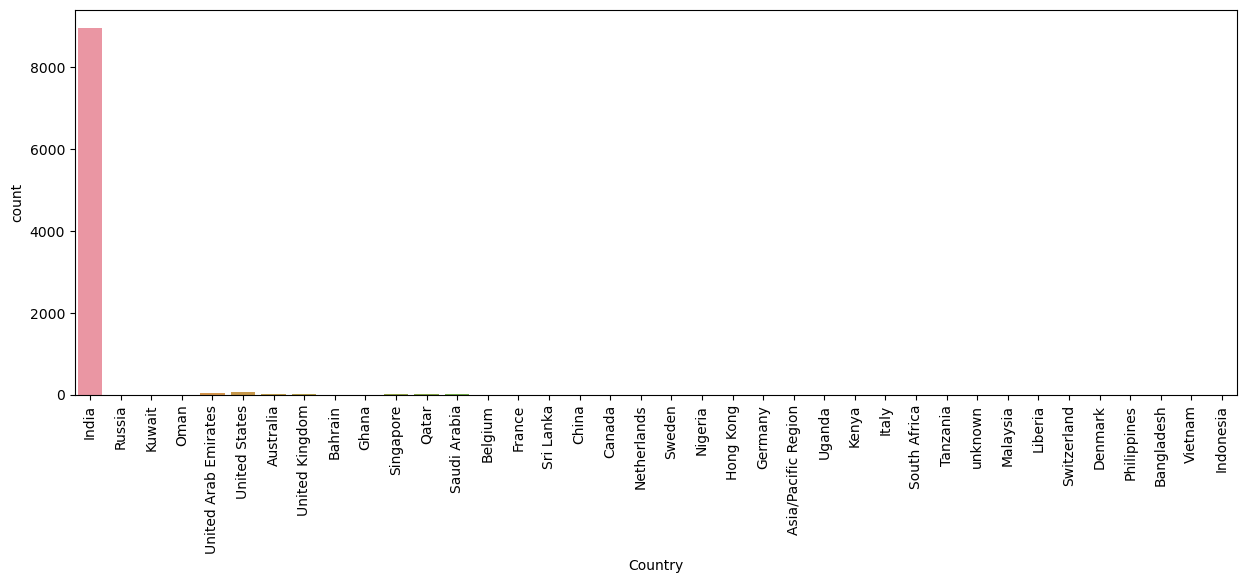

In [38]:
# To verify plotting count plot after imputation:-

plt.figure(figsize=(15,5))
sns.countplot(x='Country', data=lead_df1)
plt.xticks(rotation=90)
plt.show()

### Observation

Before imputation in 'Country' column % of 'india' was ~70% but after imputing missing values with 'India' it's % became ~96% ,which will not contribute much in analysis so better to drop it cause data is skewed here.

In [39]:
# Dropping 'Country' column from dataframe:-

lead_df1.drop('Country',axis=1,inplace=True)

In [40]:
# Checking value counts of 'Lead Source':-

lead_df1['Lead Source'].value_counts()

Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64

### Observation 
- From above data we can see that there are two 'Google' and 'google' ,so better to replace 'google' with 'Google'.

- 'Google' is having highest number occurance so we can impute missing values with 'Google'.

In [41]:
# Replace 'google' with 'Google' :-

lead_df1['Lead Source']=lead_df1['Lead Source'].replace('google','Google')

In [42]:
# Verifying value counts again:-

lead_df1['Lead Source'].value_counts()

Lead Source
Google               2873
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
Pay per Click Ads       1
blog                    1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
testone                 1
NC_EDM                  1
Name: count, dtype: int64

In [43]:
# Imputing missing values with 'Google':-

lead_df1['Lead Source'].fillna('Google',inplace=True)

Treating ~1% missing value columns


In [44]:
# Checking value counts of 'Last Activity':-

lead_df1['Last Activity'].value_counts()

Last Activity
Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: count, dtype: int64

In [45]:
# Imputing missing values with 'Email Opened':-

lead_df1['Last Activity'] = lead_df1['Last Activity'].replace(np.nan, 'Email Opened')

In [46]:
# Imputing missing value with 'median' value for both 'TotalVisits' and 'Page Views Per Visit' columns:-

lead_df1['TotalVisits'].fillna(lead_df1['TotalVisits'].median(), inplace=True)

lead_df1['Page Views Per Visit'].fillna(lead_df1['Page Views Per Visit'].median(), inplace=True)

In [47]:
# Now checking shape of the dataframe:-

lead_df1.shape

(9240, 27)

In [48]:
# Checking missing values after treating missing values:-

round(100*(lead_df1.isnull().sum()/len(lead_df1)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       0.00
Total Time Spent on Website                       0.00
Page Views Per Visit                              0.00
Last Activity                                     0.00
Specialization                                    0.00
What is your current occupation                   0.00
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

### Observation 
We can see that there is no missing values now,so we can proceed with next task

# Checking 'Prospect ID' and 'Lead Number' columns 

In [49]:
# Checking duplicate values in 'Prospect ID':-

lead_df1.duplicated(subset = 'Prospect ID').sum()

0

In [50]:
# Checking duplicate values in 'Lead Number':-

lead_df1.duplicated(subset = 'Lead Number').sum()

0

### Observation 
'Prospect ID' and 'Lead Number' both do not have duplicate values means these columns identify each data uniquely so working as unique Id and will not make any significant impact on our model.So we can drop it.

In [51]:
# Dropping 'Prospect ID' and 'Lead Number' variables:-

lead_df1.drop(['Prospect ID','Lead Number'],axis=1,inplace=True)

# Value_counts of variables to check data balancing

In [52]:
# Checking the value_counts of remaining variables for better data understanding :-

cols=list(lead_df1.iloc[:,:])  # Creating list 'cols' of variables


for i in cols:
    print(i,'=====')
    print(lead_df1[i].value_counts(), '\n')

Lead Origin =====
Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64 

Lead Source =====
Lead Source
Google               2909
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
Pay per Click Ads       1
blog                    1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
testone                 1
NC_EDM                  1
Name: count, dtype: int64 

Do Not Email =====
Do Not Email
No     8506
Yes     734
Name: count, dtype: int64 

Do Not Call =====
Do Not Call
No     9238
Yes       2
Name: count, dtype: int64 

Converted =====
Converted
0    5679
1 

### Observation 

From the above value_counts data we can see that columns 'Do Not Call','Search','Magazine','Newspaper Article','X Education Forums','Newspaper,'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','
Get updates on DM Content','I agree to pay the amount through cheque' are having highly imbalance data or skewed data and these variables will not contribute significatly to analysis ,so better to drop these columns.

#### Dropping some irrelevant columns

In [53]:
# Dropping variables which are having imbalanced data:-

lead_df1.drop(['Do Not Call','What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
          'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'],axis=1,inplace=True)

In [54]:
# Dropping column 'last Notable Activity':-

lead_df1.drop('Last Notable Activity',axis=1,inplace=True)

In [55]:
# Checking shape of the dataframe after dropping variables:-

lead_df1.shape

(9240, 11)

In [56]:
# Displaying head of 'lead_df1' dataframe :-

lead_df1.head()

Lead Origin     Lead Source Do Not Email  Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit            Last Activity           Specialization What is your current occupation A free copy of Mastering The Interview
0                      API      Olark Chat           No          0          0.0                            0                   0.0  Page Visited on Website                    Other                      Unemployed                                     No
1                      API  Organic Search           No          0          5.0                          674                   2.5             Email Opened                    Other                      Unemployed                                     No
2  Landing Page Submission  Direct Traffic           No          1          2.0                         1532                   2.0             Email Opened  Business Administration                         Student                                    Yes
3  Landing Page Submission  Direct Traffic           No          0          1.0                          305                   1.0              Unreachable    Media and Advertising                      Unemployed                                     No
4  Landing Page Submission          Google           No          1          2.0                         1428                   1.0        Converted to Lead                    Other                      Unemployed                                     No

# Step 3: Exploratory Data Analysis(EDA)

### Univariate Analysis

As per problem statement 'Converted' is our target variable.
The target variable. Indicates whether a lead has been successfully converted or not.
- 0: Not converted into lead.
- 1: Lead has been successfully Converted.

#### Calculating conversion rate

In [57]:
# Calculating conversion rate:-

Converted = (sum(lead_df1['Converted'])/len(lead_df1['Converted'].index))*100
Converted

38.53896103896104

#### Checking Distribution of 'TARGET' Variable

In [58]:
#Checking value count of target variable 'Converted':-
lead_df1.Converted.value_counts()

Converted
0    5679
1    3561
Name: count, dtype: int64

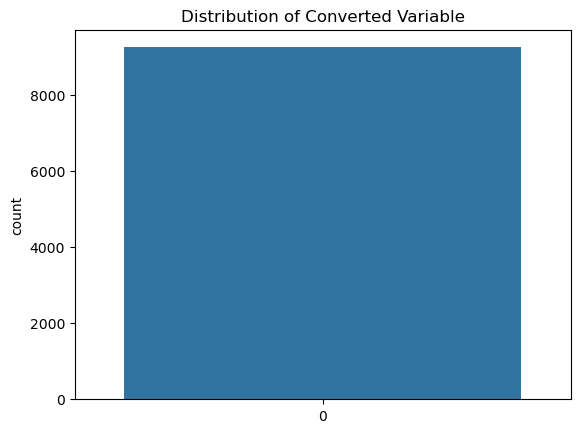

In [59]:
#Plotting count plot to get clear view of data distribution of 'Converted' column:-

sns.countplot(lead_df1.Converted)
plt.title("Distribution of Converted Variable")
plt.show()

In [60]:
#Checking ratio of imbalance:-

(lead_df1.Converted==1).sum()/(lead_df1.Converted==0).sum()

0.6270470153195985

### Observation
From value count and count plot we can see that data is properly balanced with respect to ratio.

In [61]:
# Again checking data types of remaining columns:-

lead_df1.dtypes

Lead Origin                                object
Lead Source                                object
Do Not Email                               object
Converted                                   int64
TotalVisits                               float64
Total Time Spent on Website                 int64
Page Views Per Visit                      float64
Last Activity                              object
Specialization                             object
What is your current occupation            object
A free copy of Mastering The Interview     object
dtype: object

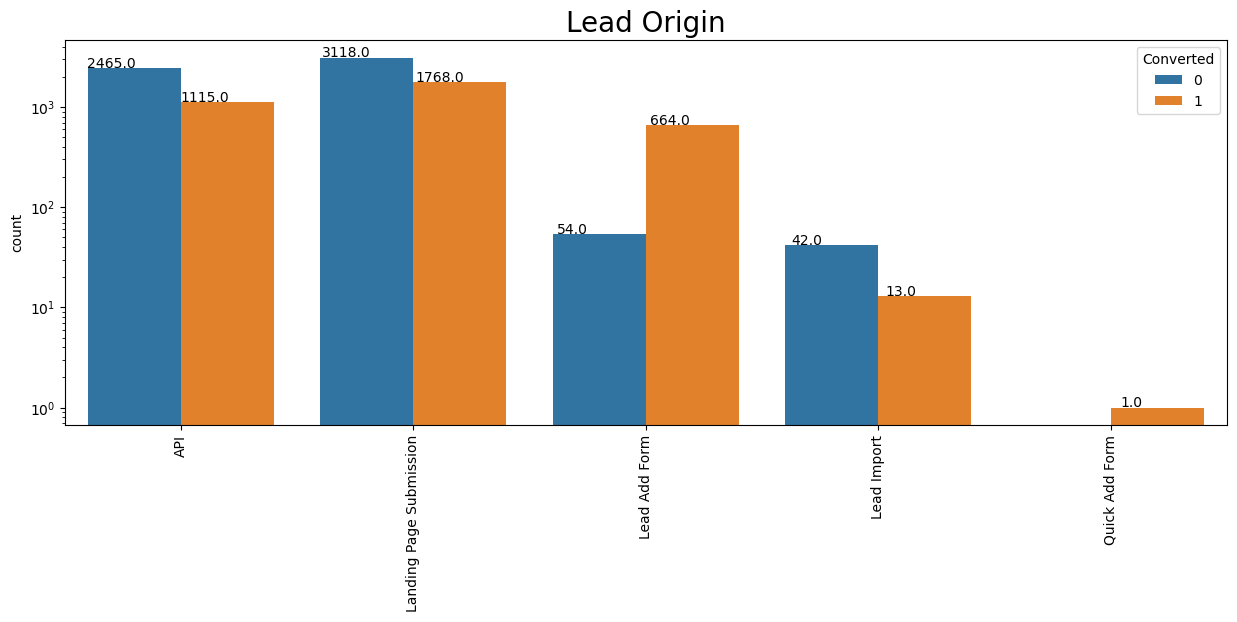

In [62]:
# Plotting count plot of 'Lead Origin' for both 'Converted' 0 and 1 :-

plt.figure(figsize = (15,5))

ax=sns.countplot(x = "Lead Origin", hue = "Converted", data = lead_df1)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel=None)

plt.xticks(rotation = 90)
plt.title('Lead Origin',fontsize=20)
ax.set_yscale('log')

plt.show()

### Observation 
From above plot we can observe and calculate that :

- Conversion rate for 'API' is ~ 31% and for 'Landing Page Submission' is ~36%.
- For 'Lead Add Form' number of conversion is more than unsuccessful conversion.
- Count of 'Lead Import' is lesser.

#### Recommendation
To improve overall lead conversion rate, we need to focus more on improving lead conversion of API and Landing Page Submission origin and generate more leads from Lead Add Form

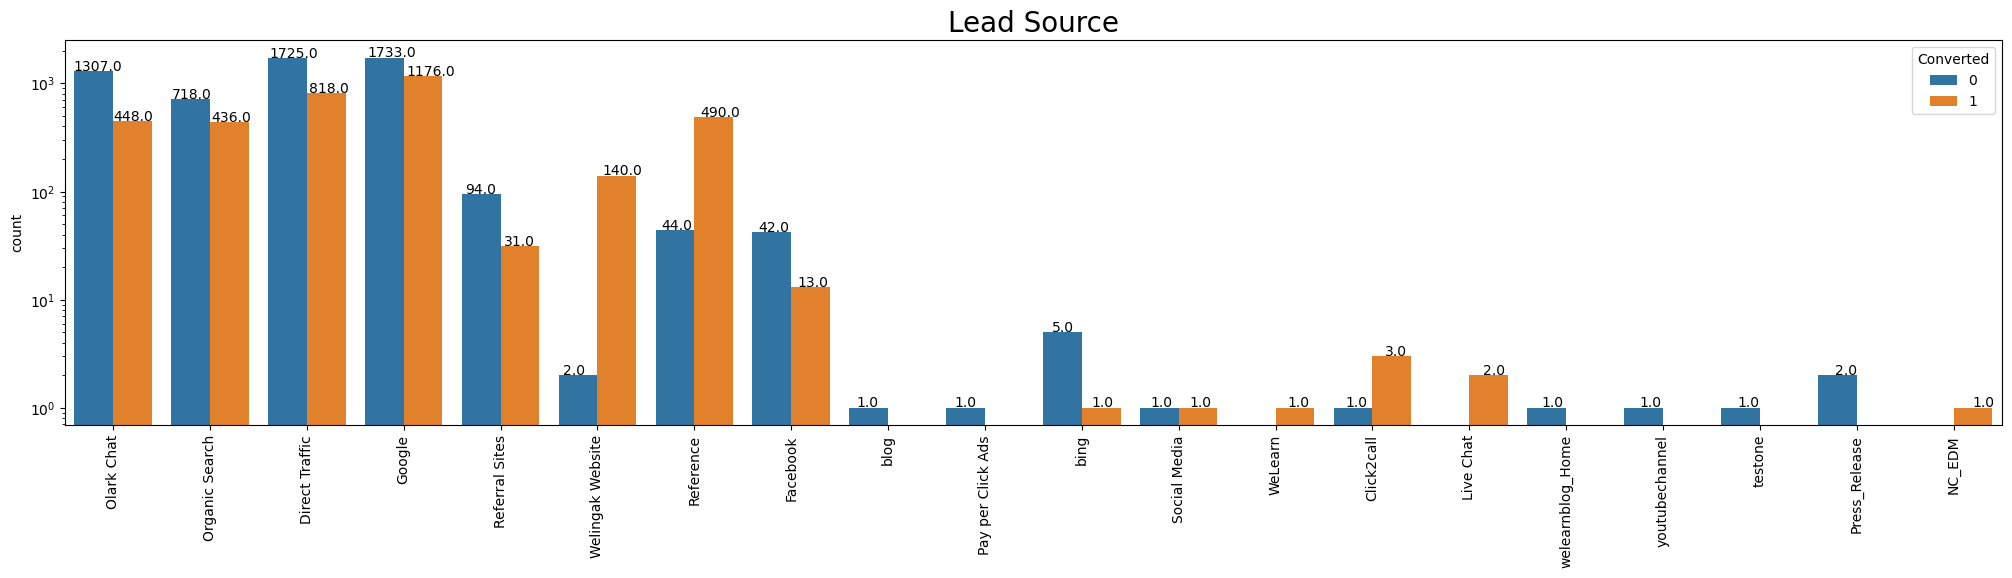

In [63]:
# Plotting count plot of 'Lead Source' based on 'Converted' value 0 and 1 :-

plt.figure(figsize = (25,5))

ax=sns.countplot(x = "Lead Source", hue = "Converted", data = lead_df1)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel=None)

plt.xticks(rotation = 90)
plt.title('Lead Source',fontsize=20)

ax.set_yscale('log')# Setting logrithmic scale

plt.show()

#### Clubbing lower frequency values together under a common label 'Others'

In [64]:
# Combining all low frequency values together:-

lead_df1['Lead Source'] = lead_df1['Lead Source'].replace(['blog','Pay per Click Ads','bing','Social Media','WeLearn','Click2call', 'Live Chat','welearnblog_Home', 'youtubechannel','testone',
                                                           'Press_Release','NC_EDM'], 'Others')

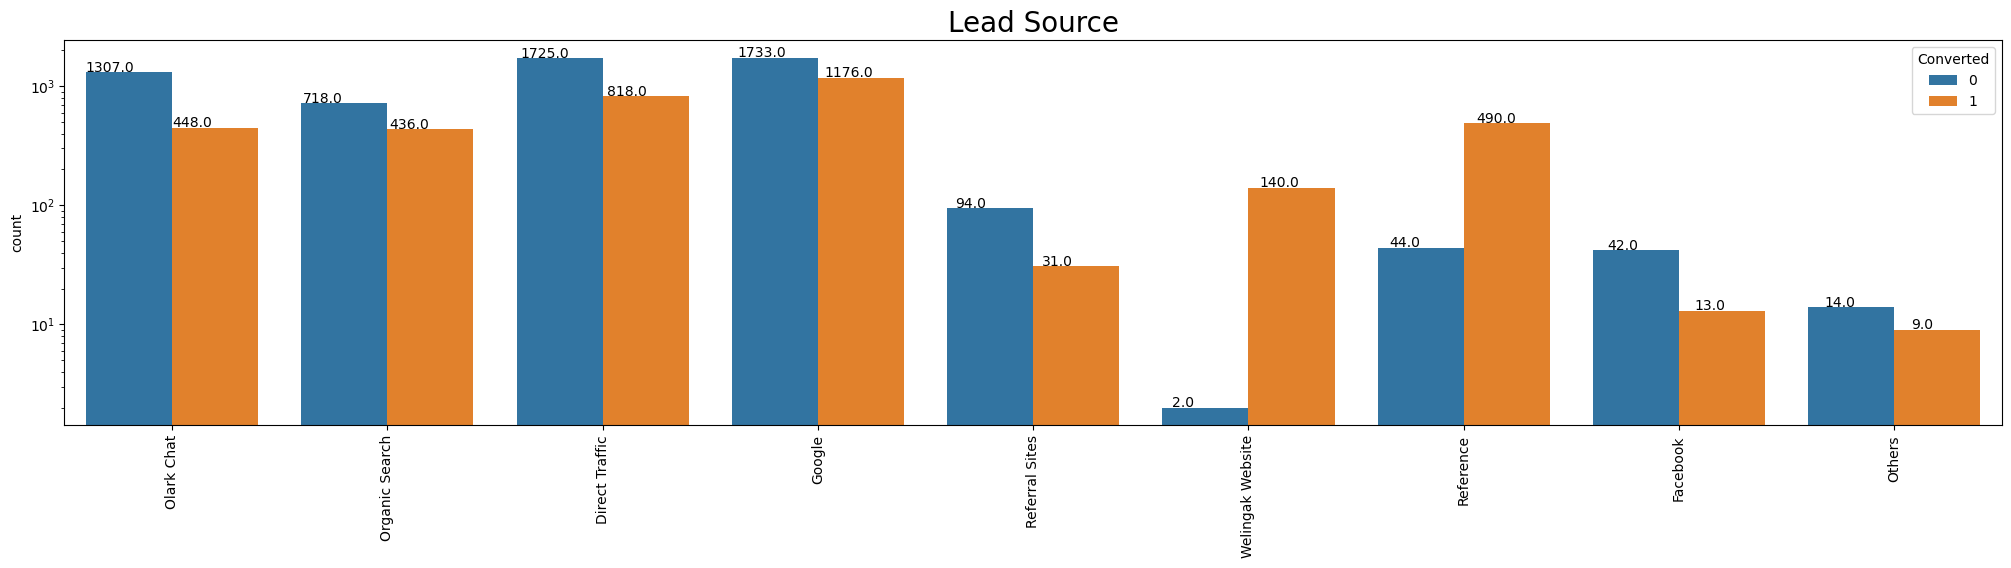

In [65]:
# Again plotting count plot of 'Lead Source' based on 'Converted' value 0 and 1 :-

plt.figure(figsize = (25,5))

ax=sns.countplot(x = "Lead Source", hue = "Converted", data = lead_df1)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel=None)

plt.xticks(rotation = 90)
plt.title('Lead Source',fontsize=20)

ax.set_yscale('log')

plt.show()

### Observation
From above plot we can observe:
- Google and Direct traffic generates maximum number of leads.
- Conversion rate of 'Reference' and 'Welingak Website' leads is high.
#### Recommendation
To improve overall lead conversion rate, focus should be on improving lead converion of olark chat, organic search, direct traffic, and google leads and generate more leads from reference and welingak website.

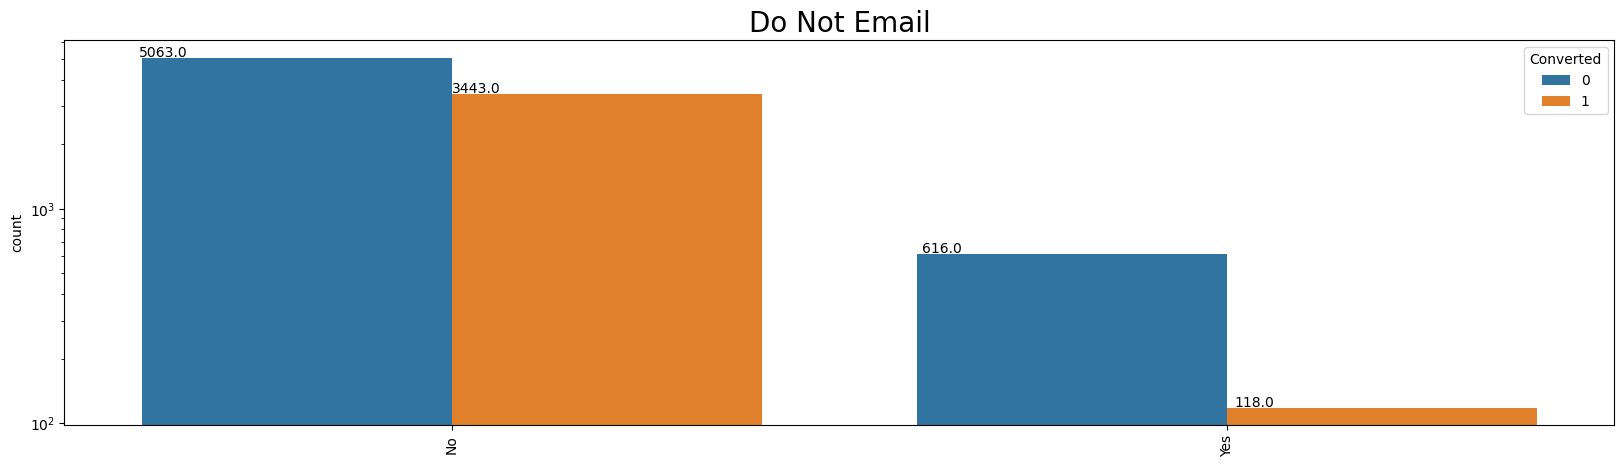

In [66]:
# Plotting count plot of 'Lead Source' based on 'Converted' value 0 and 1 :-

plt.figure(figsize = (20,5))

ax=sns.countplot(x = "Do Not Email", hue = "Converted", data = lead_df1)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel=None)

plt.xticks(rotation = 90)
plt.title('Do Not Email',fontsize=20)

ax.set_yscale('log')# Setting logrithmic scale

plt.show()

### Observation
- People who opted for mail option are becoming more leads.

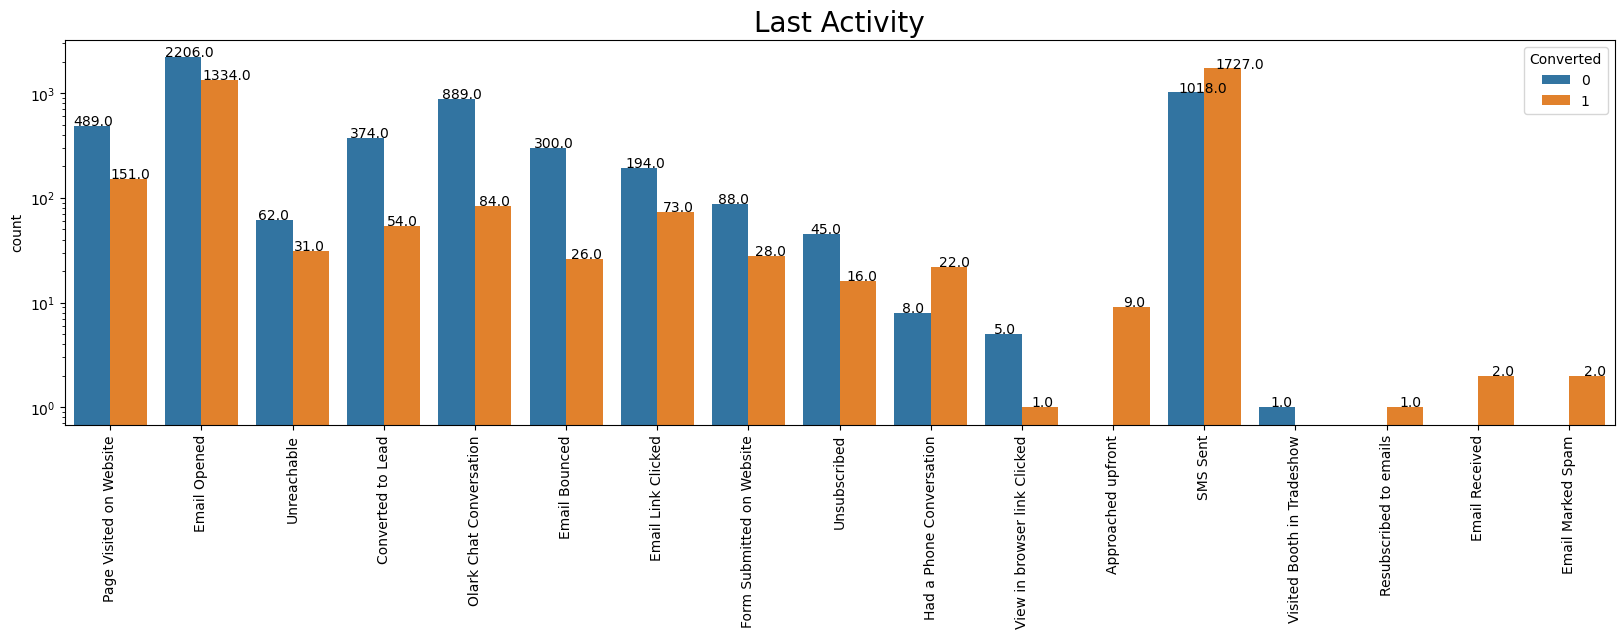

In [67]:
# Plotting count plot of 'Lead Source' based on 'Converted' value 0 and 1 :-

plt.figure(figsize = (20,5))

ax=sns.countplot(x = "Last Activity", hue = "Converted", data = lead_df1)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel=None)

plt.xticks(rotation = 90)
plt.title('Last Activity',fontsize=20)

ax.set_yscale('log')# Setting logrithmic scale

plt.show()

In [68]:
# Combining all low frequency values together under label 'Others':-

lead_df1['Last Activity'] = lead_df1['Last Activity'].replace(['Had a Phone Conversation','View in browser link Clicked','Visited Booth in Tradeshow',
      'Approached upfront','Resubscribed to emails','Email Received','Email Marked Spam'],'Others')

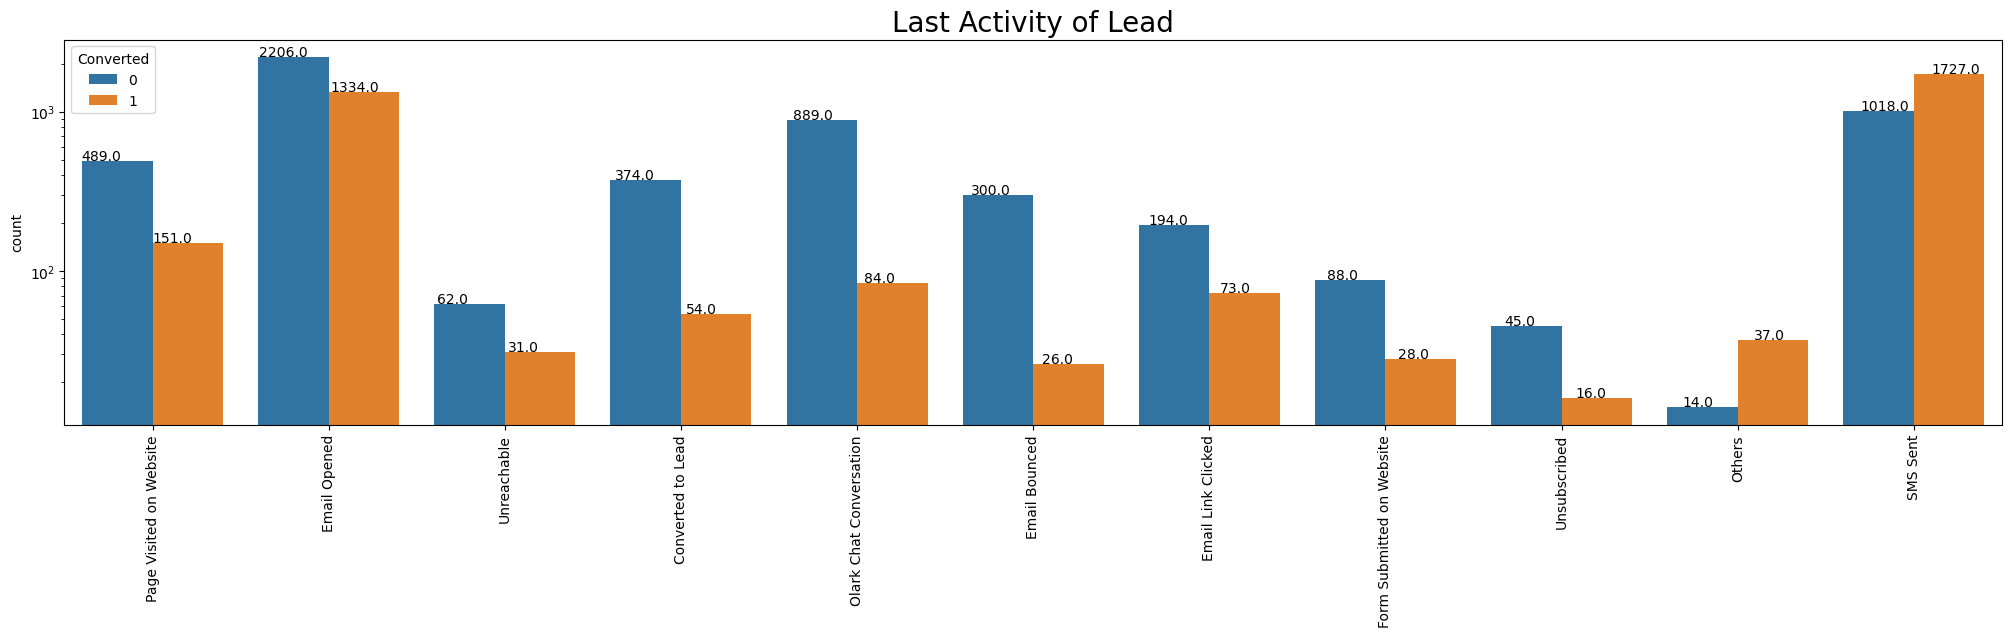

In [69]:
# Again plotting count plot of 'Last Activity' based on 'Converted' value 0 and 1 :-

plt.figure(figsize = (25,5))

ax=sns.countplot(x = "Last Activity", hue = "Converted", data = lead_df1)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel=None)

plt.xticks(rotation = 90)
plt.title('Last Activity of Lead',fontsize=20)

ax.set_yscale('log')

plt.show()

### Observation
From above plot we can observe :
- Conversion rate for last activity of 'SMS Sent'is ~63%.
- Highest last activity of leads is 'Email Opened' .

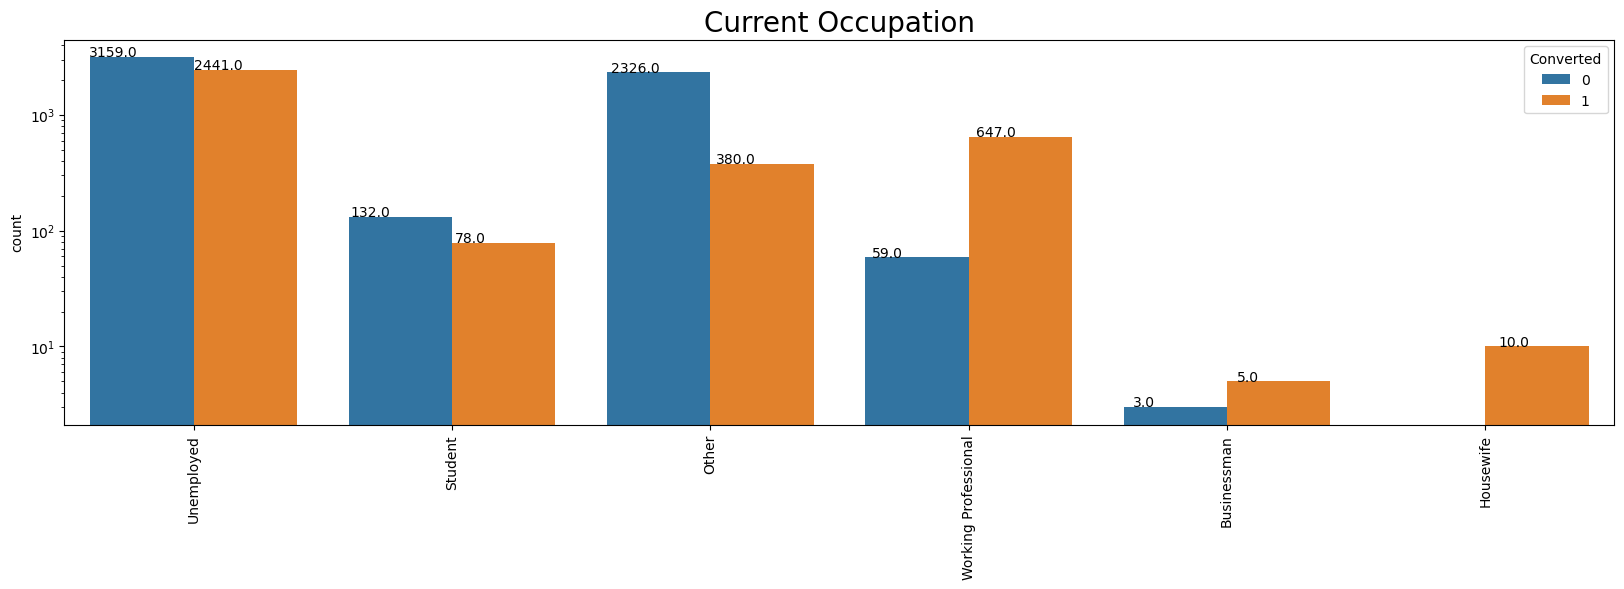

In [70]:
# Plotting count plot of 'What is your current occupation' based on 'Converted' value 0 and 1 :-

plt.figure(figsize = (20,5))

ax=sns.countplot(x = "What is your current occupation", hue = "Converted", data = lead_df1)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel=None)

plt.xticks(rotation = 90)
plt.title('Current Occupation',fontsize=20)

ax.set_yscale('log')# Setting logrithmic scale

plt.show()

### Observation

- 'Unemployed' leads are generationg more number of leads and having ~45% conversion rate.
- Conversion rate is higher for 'Working Professionals' .

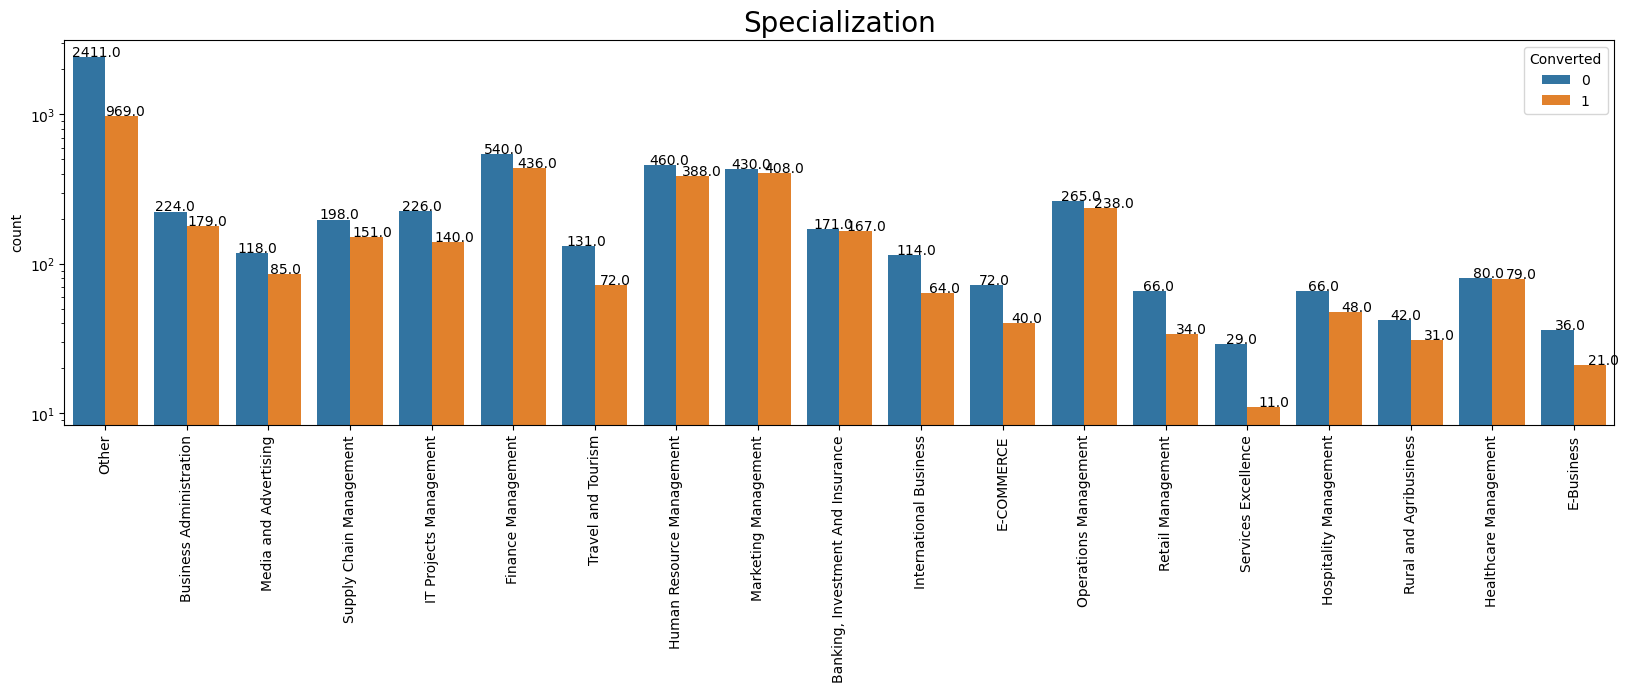

In [71]:
# Plotting count plot of 'Specialization' based on 'Converted' value 0 and 1 :-

plt.figure(figsize = (20,5))

ax=sns.countplot(x = "Specialization", hue = "Converted", data = lead_df1)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel=None)

plt.xticks(rotation = 90)
plt.title('Specialization',fontsize=20)

ax.set_yscale('log')# Setting logrithmic scale

plt.show()

### Observation

We can observe from above count plot of 'Specialization' that 'Management' specialization altogether having more number of leads generating.And Other category is also generating more number of leads.

# Outlier Analysis and treatment

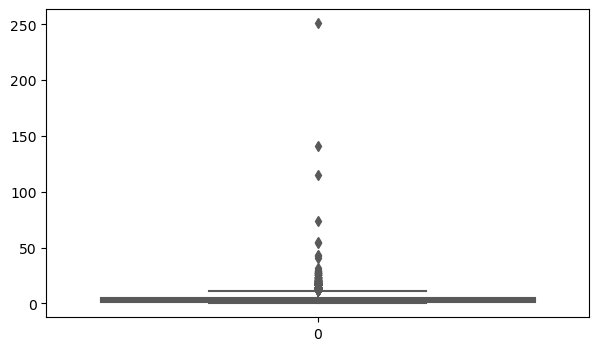

In [72]:
# Plotting box plots to visualize data distribution of 'TotalVisits':-

plt.figure(figsize = (7,4))
sns.boxplot(lead_df1['TotalVisits'],orient='v',palette='Set2')

plt.show()

### Observation
We can see from above box plot that only upper range outliers are present in data, so need to treat outliers.

In [73]:
# Treating outliers by capping upper range to 0.99:-

Q3 = lead_df1.TotalVisits.quantile(0.99)

lead_df1 = lead_df1[(lead_df1.TotalVisits <= Q3)]

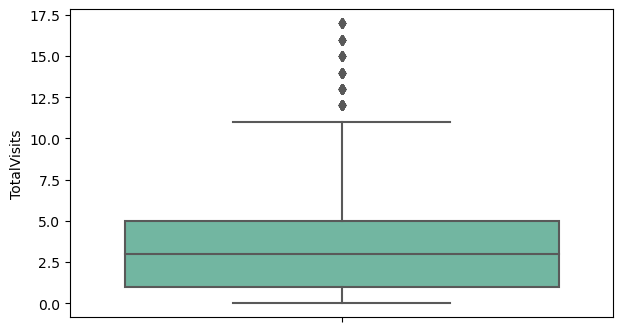

In [74]:
# Verifying outliers after removing it :-

plt.figure(figsize = (7,4))
sns.boxplot(y=lead_df1['TotalVisits'],palette='Set2')
plt.show()

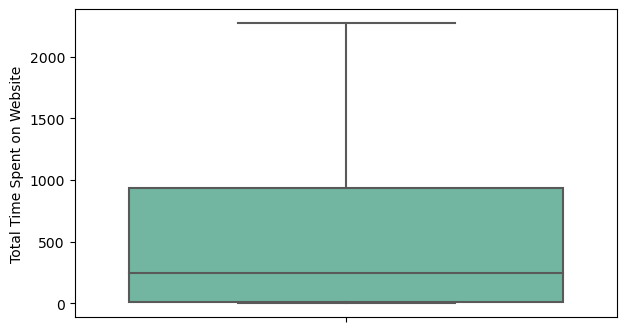

In [75]:
# Plotting box plots to visualize data distribution of 'Total Time Spent on Website':-

plt.figure(figsize=(7,4))
sns.boxplot(y=lead_df1['Total Time Spent on Website'],orient='v',palette='Set2')
plt.show()

### Bivariate Analysis

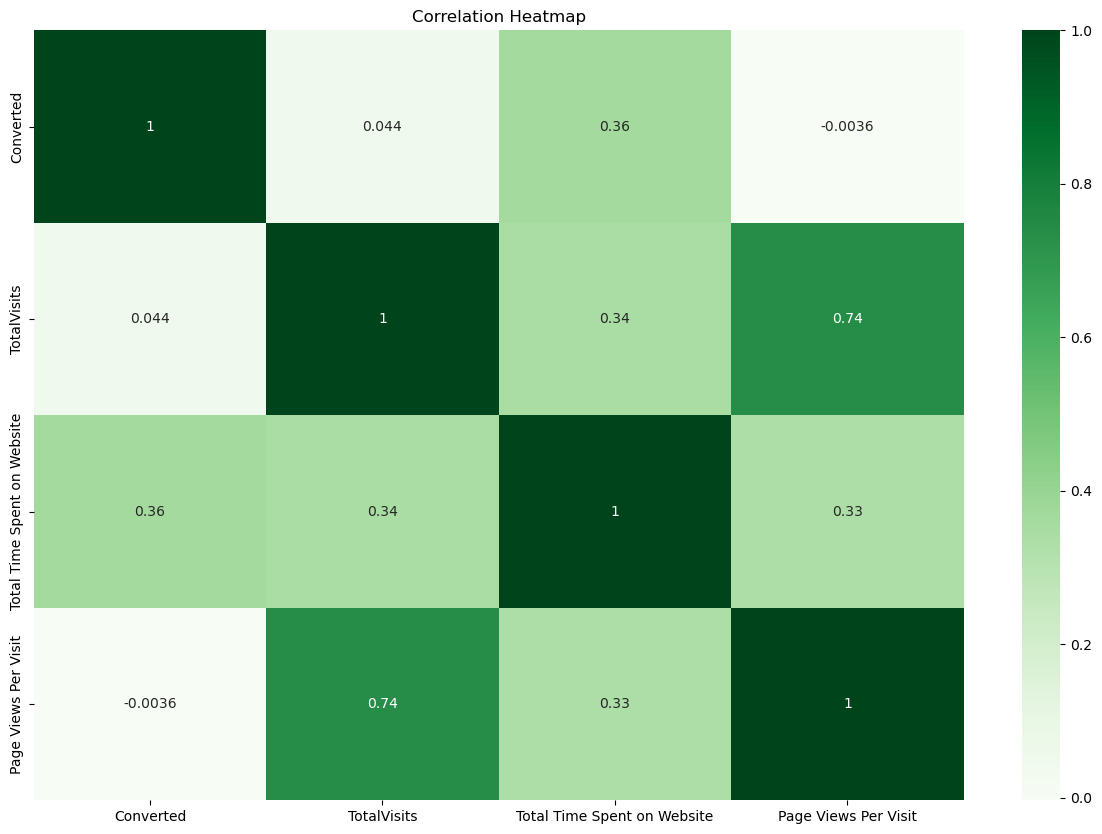

In [82]:
# Select only numeric columns
numeric_columns = lead_df1.select_dtypes(include=['number'])

# Create the correlation matrix
correlation_matrix = numeric_columns.corr()

# Plot the heatmap
plt.figure(figsize=(15, 10))
ax = sns.heatmap(correlation_matrix, annot=True, cmap='Greens')
plt.title('Correlation Heatmap')
plt.show()


### Observation

- 'TotalVisits' and 'Page Views per Visit' are highly correlated with correlation of .72
- 'Total Time Spent on Website' has correlation of 0.36 with target variable 'Converted'.

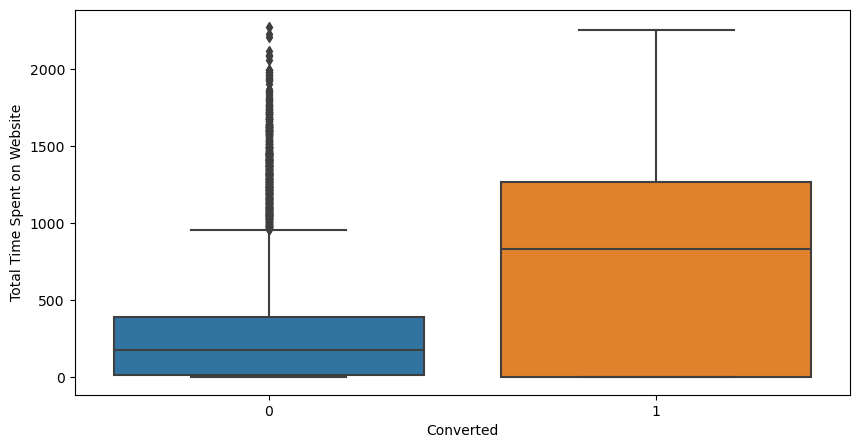

In [83]:
# Plotting box plot of "Total Time Spent on Website" vs Converted variable to check data distribution:-

plt.figure(figsize=(10,5))
sns.boxplot(x='Converted', y='Total Time Spent on Website',data=lead_df1)
plt.show()

### Observation
Leads spending more time on website are  more likely to opt for curses or converted.

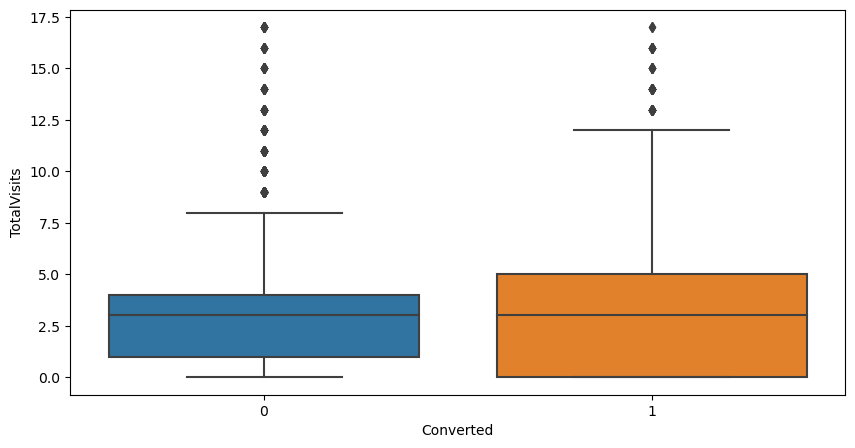

In [84]:
# Plotting box of "Total Visits" vs Converted variable to check data distribution:-

plt.figure(figsize=(10,5))
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = lead_df1)
plt.show()

### Observation
From above plot we can see that median for converted and non-converted is approx same.

## Step 4: Data Preparation

#### Converting some binary variables (Yes/No) to 0/1

In [85]:
# Variable to map:
var = ['Do Not Email', 'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    if isinstance(x, str):
        return 1 if x == 'Yes' else 0
    else:
        return x

# Applying the function to the variables:
lead_df1[var] = lead_df1[var].applymap(binary_map)


In [86]:
# Checking head of dataframe again:-

lead_df1.head()

Lead Origin     Lead Source  Do Not Email  Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit            Last Activity           Specialization What is your current occupation  A free copy of Mastering The Interview
0                      API      Olark Chat             0          0          0.0                            0                   0.0  Page Visited on Website                    Other                      Unemployed                                       0
1                      API  Organic Search             0          0          5.0                          674                   2.5             Email Opened                    Other                      Unemployed                                       0
2  Landing Page Submission  Direct Traffic             0          1          2.0                         1532                   2.0             Email Opened  Business Administration                         Student                                       1
3  Landing Page Submission  Direct Traffic             0          0          1.0                          305                   1.0              Unreachable    Media and Advertising                      Unemployed                                       0
4  Landing Page Submission          Google             0          1          2.0                         1428                   1.0        Converted to Lead                    Other                      Unemployed                                       0

### Creating Dummy Variable

#### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [87]:
# Creating list 'cat_col' of categorical columns :-

cat_col= lead_df1.select_dtypes(include=['object']).columns
cat_col

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'What is your current occupation'], dtype='object')

In [88]:
# Creating dummy variable for some of the categorical variables and dropping the first one using 'drop_first=True':-

dummy = pd.get_dummies(lead_df1[['Lead Origin', 'Lead Source', 'Last Activity','What is your current occupation',
                             'Specialization']], drop_first=True)
dummy = dummy.astype(int)

dummy.head()

Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  Lead Origin_Lead Import  Lead Origin_Quick Add Form  Lead Source_Facebook  Lead Source_Google  Lead Source_Olark Chat  Lead Source_Organic Search  Lead Source_Others  Lead Source_Reference  Lead Source_Referral Sites  Lead Source_Welingak Website  Last Activity_Email Bounced  Last Activity_Email Link Clicked  Last Activity_Email Opened  Last Activity_Form Submitted on Website  Last Activity_Olark Chat Conversation  Last Activity_Others  Last Activity_Page Visited on Website  Last Activity_SMS Sent  Last Activity_Unreachable  Last Activity_Unsubscribed  What is your current occupation_Housewife  What is your current occupation_Other  What is your current occupation_Student  What is your current occupation_Unemployed  What is your current occupation_Working Professional  Specialization_Business Administration  Specialization_E-Business  Specialization_E-COMMERCE  Specialization_Finance Management  \
0                                    0                          0                        0                           0                     0                   0                       1                           0                   0                      0                           0                             0                            0                                 0                           0                                        0                                      0                     0                                      1                       0                          0                           0                                          0                                      0                                        0                                           1                                                  0                                          0                          0                          0                                  0   
1                                    0                          0                        0                           0                     0                   0                       0                           1                   0                      0                           0                             0                            0                                 0                           1                                        0                                      0                     0                                      0                       0                          0                           0                                          0                                      0                                        0                                           1                                                  0                                          0                          0                          0                                  0   
2                                    1                          0                        0                           0                     0                   0                       0                           0                   0                      0                           0                             0                            0                                 0                           1                                        0                                      0                     0                                      0                       0                          0                           0                                          0                                      0                                        1                                           0                                                  0                                          1                          0                          0                                  0   
3                                    1                          0                        0 

In [89]:
# Adding dummy variables dataset 'dummy' to original dataset 'lead_df1':-

lead_df1= pd.concat([dummy,lead_df1],axis = 1)

In [90]:
#Checking head of dataframe 'lead_df1':-

lead_df1.head()

Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  Lead Origin_Lead Import  Lead Origin_Quick Add Form  Lead Source_Facebook  Lead Source_Google  Lead Source_Olark Chat  Lead Source_Organic Search  Lead Source_Others  Lead Source_Reference  Lead Source_Referral Sites  Lead Source_Welingak Website  Last Activity_Email Bounced  Last Activity_Email Link Clicked  Last Activity_Email Opened  Last Activity_Form Submitted on Website  Last Activity_Olark Chat Conversation  Last Activity_Others  Last Activity_Page Visited on Website  Last Activity_SMS Sent  Last Activity_Unreachable  Last Activity_Unsubscribed  What is your current occupation_Housewife  What is your current occupation_Other  What is your current occupation_Student  What is your current occupation_Unemployed  What is your current occupation_Working Professional  Specialization_Business Administration  Specialization_E-Business  Specialization_E-COMMERCE  Specialization_Finance Management  \
0                                    0                          0                        0                           0                     0                   0                       1                           0                   0                      0                           0                             0                            0                                 0                           0                                        0                                      0                     0                                      1                       0                          0                           0                                          0                                      0                                        0                                           1                                                  0                                          0                          0                          0                                  0   
1                                    0                          0                        0                           0                     0                   0                       0                           1                   0                      0                           0                             0                            0                                 0                           1                                        0                                      0                     0                                      0                       0                          0                           0                                          0                                      0                                        0                                           1                                                  0                                          0                          0                          0                                  0   
2                                    1                          0                        0                           0                     0                   0                       0                           0                   0                      0                           0                             0                            0                                 0                           1                                        0                                      0                     0                                      0                       0                          0                           0                                          0                                      0                                        1                                           0                                                  0                                          1                          0                          0                                  0   
3                                    1                          0                        0 

In [91]:
# Dropping repeated columns for which dummy variables were created:-

lead_df1.drop(['Lead Origin', 'Lead Source', 'Last Activity','What is your current occupation','Specialization'
                             ],axis=1,inplace = True)

In [92]:
# Checking shape of 'lead_df1' dataframe:-

lead_df1.shape

(9157, 51)

In [93]:
# Checking data types column wise again:-

lead_df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9157 entries, 0 to 9239
Data columns (total 51 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Lead Origin_Landing Page Submission                   9157 non-null   int32  
 1   Lead Origin_Lead Add Form                             9157 non-null   int32  
 2   Lead Origin_Lead Import                               9157 non-null   int32  
 3   Lead Origin_Quick Add Form                            9157 non-null   int32  
 4   Lead Source_Facebook                                  9157 non-null   int32  
 5   Lead Source_Google                                    9157 non-null   int32  
 6   Lead Source_Olark Chat                                9157 non-null   int32  
 7   Lead Source_Organic Search                            9157 non-null   int32  
 8   Lead Source_Others                                    9157 non-

Now you can see that you have all variables as numeric.

## Step 5: Test-Train Split

In [94]:
# Importing required library to split data:-

from sklearn.model_selection import train_test_split

In [95]:
# Putting feature variable to X:-

X = lead_df1.drop(['Converted'], axis=1)

# Displaying head :-

X.head()

Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  Lead Origin_Lead Import  Lead Origin_Quick Add Form  Lead Source_Facebook  Lead Source_Google  Lead Source_Olark Chat  Lead Source_Organic Search  Lead Source_Others  Lead Source_Reference  Lead Source_Referral Sites  Lead Source_Welingak Website  Last Activity_Email Bounced  Last Activity_Email Link Clicked  Last Activity_Email Opened  Last Activity_Form Submitted on Website  Last Activity_Olark Chat Conversation  Last Activity_Others  Last Activity_Page Visited on Website  Last Activity_SMS Sent  Last Activity_Unreachable  Last Activity_Unsubscribed  What is your current occupation_Housewife  What is your current occupation_Other  What is your current occupation_Student  What is your current occupation_Unemployed  What is your current occupation_Working Professional  Specialization_Business Administration  Specialization_E-Business  Specialization_E-COMMERCE  Specialization_Finance Management  \
0                                    0                          0                        0                           0                     0                   0                       1                           0                   0                      0                           0                             0                            0                                 0                           0                                        0                                      0                     0                                      1                       0                          0                           0                                          0                                      0                                        0                                           1                                                  0                                          0                          0                          0                                  0   
1                                    0                          0                        0                           0                     0                   0                       0                           1                   0                      0                           0                             0                            0                                 0                           1                                        0                                      0                     0                                      0                       0                          0                           0                                          0                                      0                                        0                                           1                                                  0                                          0                          0                          0                                  0   
2                                    1                          0                        0                           0                     0                   0                       0                           0                   0                      0                           0                             0                            0                                 0                           1                                        0                                      0                     0                                      0                       0                          0                           0                                          0                                      0                                        1                                           0                                                  0                                          1                          0                          0                                  0   
3                                    1                          0                        0 

In [96]:
# Putting response variable to y:-

y = lead_df1['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [97]:
# Splitting the data into train and test of 70:30 ratio:-

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [98]:
# Checking shape of 'X_train' dataset after splitting:-

X_train.shape

(6409, 50)

In [99]:
# Checking shape of 'X_test' dataset after splitting:-

X_test.shape

(2748, 50)

In [100]:
# Verifying info of data set after splitting:-

lead_df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9157 entries, 0 to 9239
Data columns (total 51 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Lead Origin_Landing Page Submission                   9157 non-null   int32  
 1   Lead Origin_Lead Add Form                             9157 non-null   int32  
 2   Lead Origin_Lead Import                               9157 non-null   int32  
 3   Lead Origin_Quick Add Form                            9157 non-null   int32  
 4   Lead Source_Facebook                                  9157 non-null   int32  
 5   Lead Source_Google                                    9157 non-null   int32  
 6   Lead Source_Olark Chat                                9157 non-null   int32  
 7   Lead Source_Organic Search                            9157 non-null   int32  
 8   Lead Source_Others                                    9157 non-

## Step 6: Feature Scaling

We are using 'StandardScaler' here for scaling.

In [101]:
##Importing required library for scaling :-

from sklearn.preprocessing import StandardScaler

In [102]:
# Creating 'scaler' object for 'StandardScaler':-

scaler = StandardScaler()

# Applying 'fit_transform' to scale the 'train' data set:-

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

# Displaying the head of the data after scaling:-
X_train.head()

Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  Lead Origin_Lead Import  Lead Origin_Quick Add Form  Lead Source_Facebook  Lead Source_Google  Lead Source_Olark Chat  Lead Source_Organic Search  Lead Source_Others  Lead Source_Reference  Lead Source_Referral Sites  Lead Source_Welingak Website  Last Activity_Email Bounced  Last Activity_Email Link Clicked  Last Activity_Email Opened  Last Activity_Form Submitted on Website  Last Activity_Olark Chat Conversation  Last Activity_Others  Last Activity_Page Visited on Website  Last Activity_SMS Sent  Last Activity_Unreachable  Last Activity_Unsubscribed  What is your current occupation_Housewife  What is your current occupation_Other  What is your current occupation_Student  What is your current occupation_Unemployed  What is your current occupation_Working Professional  Specialization_Business Administration  Specialization_E-Business  Specialization_E-COMMERCE  Specialization_Finance Management  \
6490                                    0                          0                        0                           0                     0                   1                       0                           0                   0                      0                           0                             0                            0                                 0                           0                                        0                                      0                     0                                      0                       0                          0                           0                                          0                                      0                                        0                                           1                                                  0                                          0                          0                          0                                  0   
4026                                    0                          0                        0                           0                     0                   1                       0                           0                   0                      0                           0                             0                            0                                 0                           0                                        0                                      0                     0                                      0                       1                          0                           0                                          0                                      0                                        0                                           1                                                  0                                          0                          0                          0                                  0   
6453                                    1                          0                        0                           0                     0                   0                       0                           0                   0                      0                           0                             0                            0                                 0                           0                                        0                                      0                     0                                      0                       1                          0                           0                                          0                                      0                                        0                                           1                                                  0                                          0                          0                          0                                  0   
8949                                    1                          0              

#### Checking the Correlation Matrix

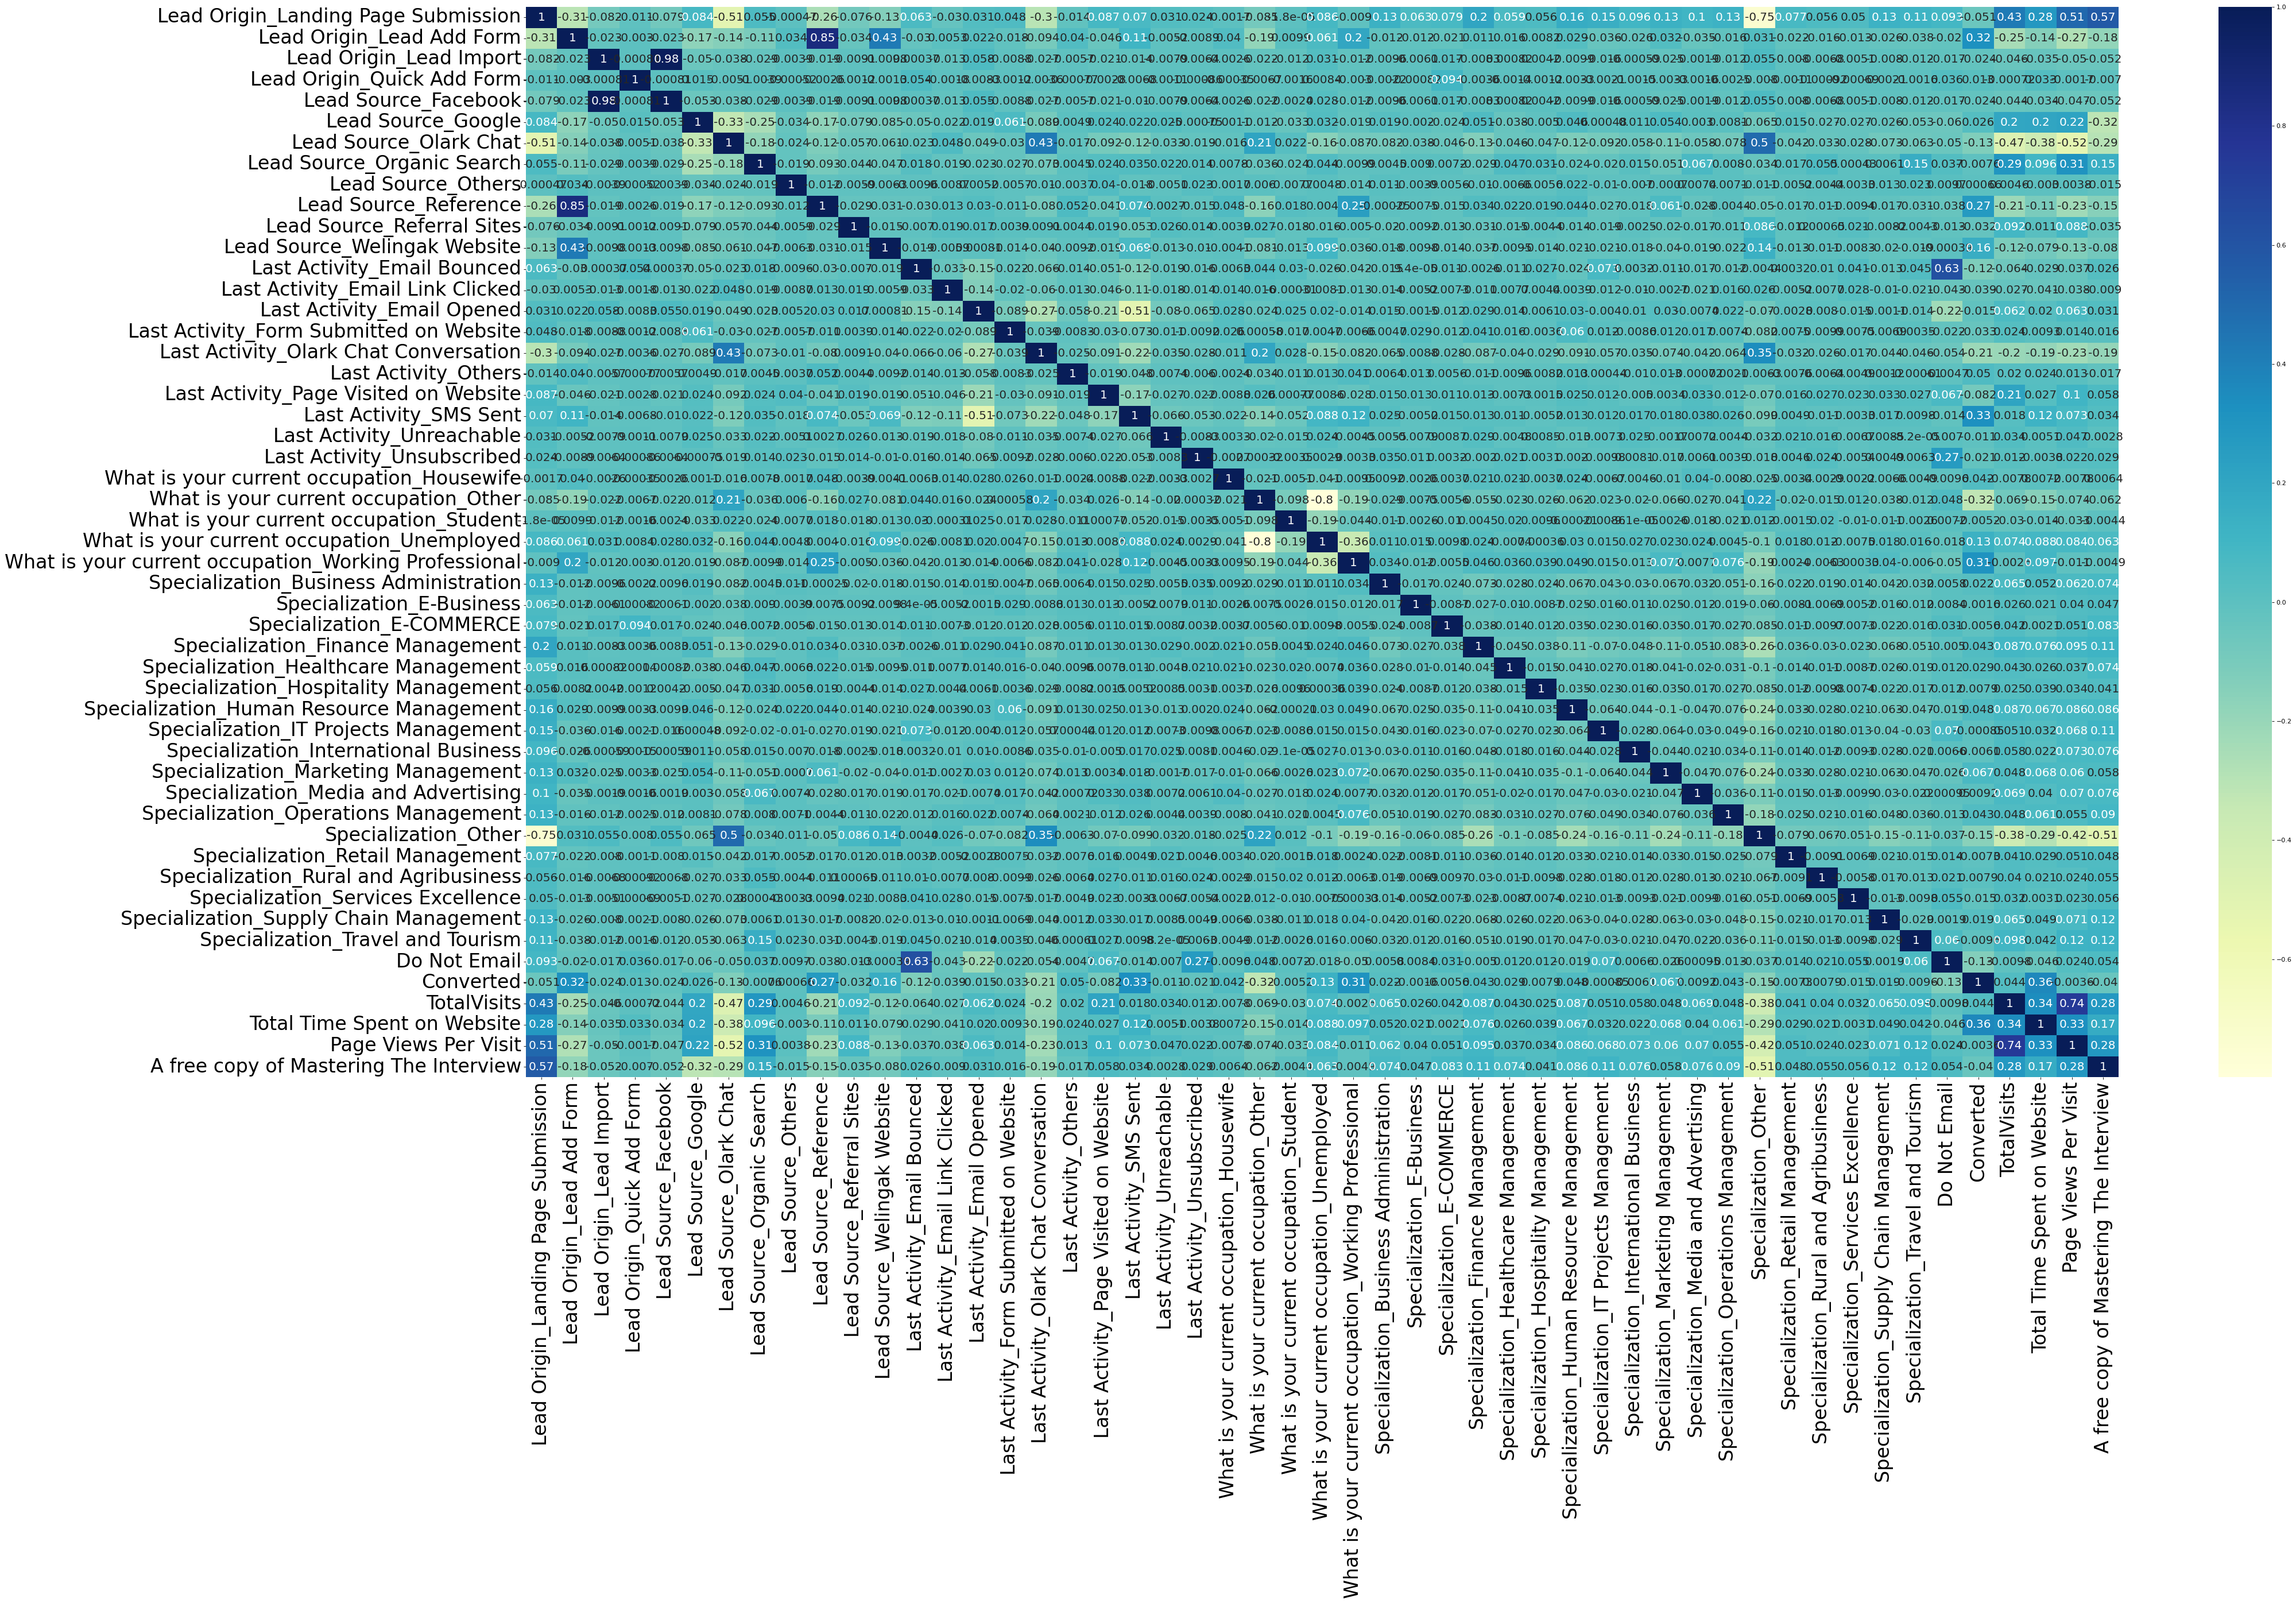

In [103]:
# Let's check the correlation coefficients to see which variables are highly correlated:-

plt.figure(figsize = (55, 35),dpi=80)
sns.heatmap(lead_df1.corr(), annot = True, cmap="YlGnBu",annot_kws={"size": 18})
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.tight_layout()
plt.show()

### Observation

The heatmap clearly shows which all variable are multicollinear in nature, and which variable have high collinearity with the target variable. - We will refer this map for building the logistic model so as to validate different correlated values along with VIF & p-value, for identifying the correct variable to select/eliminate from the model.
From above heatmap we can see that:- 
- 'Lead Source_Facebook' and 'Lead Origin_Lead Import' having higher correlation of 0.98.
- 'Do Not Email' and 'Last Activity_Email Bounced' having higher correlation.
- 'Lead Origin_Lead Add Form' and 'Lead Source_Referance' having higher correlation of 0.85.
- 'TotalVisits' and 'Page Views Per Visit' having correlation of 0.72.
- 'Lead Origin_Lead Add Form' ,'Lead Source_Welingak Website', 'Last Activity_SMS Sent' and 'What is your current Occupation_Working Professionals' having positive correlation with our target variable 'Converted'.

## Step 7: Model Building

#### Model Building using Stats Model & RFE

In [104]:
#Importing 'LogisticRegression' :-

from sklearn.linear_model import LogisticRegression

# Creating LogisticRegression Object called 'regressor':-

regressor = LogisticRegression()

### Using RFE for feature elimination

In [106]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression  # Example estimator

# Initialize your estimator (regressor)
regressor = LinearRegression()

# Initialize RFE with the regressor and the number of features to select
rfe = RFE(estimator=regressor, n_features_to_select=15)

# Fit RFE to your training data
rfe = rfe.fit(X_train, y_train)


In [107]:
#Displaying columns selected by RFE and their weights:-

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Origin_Quick Add Form', False, 6),
 ('Lead Source_Facebook', True, 1),
 ('Lead Source_Google', False, 21),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 22),
 ('Lead Source_Others', False, 12),
 ('Lead Source_Reference', False, 5),
 ('Lead Source_Referral Sites', False, 36),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 9),
 ('Last Activity_Email Link Clicked', False, 11),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 35),
 ('Last Activity_Olark Chat Conversation', False, 20),
 ('Last Activity_Others', True, 1),
 ('Last Activity_Page Visited on Website', False, 10),
 ('Last Activity_SMS Sent', True, 1),
 ('Last Activity_Unreachable', False, 3),
 ('Last Activity_Unsubscribed', False, 7),
 ('What is your current occupation_Housewife', T

In [108]:
# Storing columns selected by RFE into 'col' and displaying it:-

col = X_train.columns[rfe.support_]
col

Index(['Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import', 'Lead Source_Facebook', 'Lead Source_Olark Chat', 'Lead Source_Welingak Website', 'Last Activity_Email Opened', 'Last Activity_Others', 'Last Activity_SMS Sent', 'What is your current occupation_Housewife', 'What is your current occupation_Other', 'What is your current occupation_Student', 'What is your current occupation_Unemployed', 'Specialization_Other', 'Total Time Spent on Website'], dtype='object')

In [109]:
# Displaying columns which are not selected by RFE:-

X_train.columns[~rfe.support_]

Index(['Lead Origin_Quick Add Form', 'Lead Source_Google', 'Lead Source_Organic Search', 'Lead Source_Others', 'Lead Source_Reference', 'Lead Source_Referral Sites', 'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked', 'Last Activity_Form Submitted on Website', 'Last Activity_Olark Chat Conversation', 'Last Activity_Page Visited on Website', 'Last Activity_Unreachable', 'Last Activity_Unsubscribed', 'What is your current occupation_Working Professional', 'Specialization_Business Administration', 'Specialization_E-Business', 'Specialization_E-COMMERCE', 'Specialization_Finance Management', 'Specialization_Healthcare Management', 'Specialization_Hospitality Management', 'Specialization_Human Resource Management', 'Specialization_IT Projects Management', 'Specialization_International Business', 'Specialization_Marketing Management', 'Specialization_Media and Advertising', 'Specialization_Operations Management', 'Specialization_Retail Management',
       'Specialization_Rural

In [110]:
# Displaying columns which are not selected by RFE:-

X_train.columns[~rfe.support_]

Index(['Lead Origin_Quick Add Form', 'Lead Source_Google', 'Lead Source_Organic Search', 'Lead Source_Others', 'Lead Source_Reference', 'Lead Source_Referral Sites', 'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked', 'Last Activity_Form Submitted on Website', 'Last Activity_Olark Chat Conversation', 'Last Activity_Page Visited on Website', 'Last Activity_Unreachable', 'Last Activity_Unsubscribed', 'What is your current occupation_Working Professional', 'Specialization_Business Administration', 'Specialization_E-Business', 'Specialization_E-COMMERCE', 'Specialization_Finance Management', 'Specialization_Healthcare Management', 'Specialization_Hospitality Management', 'Specialization_Human Resource Management', 'Specialization_IT Projects Management', 'Specialization_International Business', 'Specialization_Marketing Management', 'Specialization_Media and Advertising', 'Specialization_Operations Management', 'Specialization_Retail Management',
       'Specialization_Rural

In [113]:
# Creating X_test dataframe with RFE selected variables:-

X_train_rfe = X_train[col]

### Using manual feature elimination

#### Running First Training Model

### Model 1
Starting with all the columns selected by RFE .

In [114]:
#Importing required 'statsmodels' library:-

import statsmodels.api as sm

In [115]:
# Add a constant:-

X_train_sm = sm.add_constant(X_train_rfe)

# Building first fitted model:-

logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial()).fit()

In [116]:
# Print a summary of the logistic regression model obtained:-

logm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6409
Model:                            GLM   Df Residuals:                     6393
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2613.0
Date:                Mon, 20 May 2024   Deviance:                       5226.0
Time:                        21:24:22   Pearson chi2:                 7.70e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4051
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          1.1253      0.217      5.188      0.000       0.700       1.550
Lead Origin_Landing Page Submission           -0.9951      0.131     -7.576      0.000      -1.253      -0.738
Lead Origin_Lead Add Form                      2.8966      0.216     13.431      0.000       2.474       3.319
Lead Origin_Lead Import                       21.3195   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Lead Source_Facebook                         -21.3924   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
Lead Source_Olark Chat                         1.2648      0.123     10.286      0.000       1.024       1.506
Lead Source_Welingak Website                   2.3340      0.749      3.114      0.002       0.865       3.803
Last Activity_Email Opened                     1.0356      0.093     11.108      0.000       0.853       1.218
Last Activity_Others                           2.0849      0.477      4.373      0.000       1.150       3.019
Last Activity_SMS Sent                         2.1210      0.097     21.771      0.000       1.930       2.312
What is your current occupation_Housewife     19.9637   1.54e+04      0.001      0.999   -3.01e+04    3.02e+04
What is your current occupation_Other         -3.4647      0.196    -17.669      0.000      -3.849      -3.080
What is your current occupation_Student       -2.2830      0.281     -8.112      0.000      -2.835      -1.731
What is your current occupation_Unemployed    -2.2099      0.183    -12.099      0.000      -2.568      -1.852
Specialization_Other                          -0.9410      0.124     -7.571      0.000      -1.185      -0.697
Total Time Spent on Website                    1.1249      0.041     27.434      0.000       1.045       1.205
==============================================================================================================
"""

### VIF Check for multicollinearity : variance_inflation_factor

In [117]:
# Importing 'variance_inflation_factor' from 'statsmodels':-

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [118]:
# Creating dataframe called 'vif' containing names feature variables and their respective VIFs:-

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
2                      Lead Origin_Lead Import  38.36
3                         Lead Source_Facebook  38.34
12  What is your current occupation_Unemployed   5.89
0          Lead Origin_Landing Page Submission   5.23
13                        Specialization_Other   3.97
10       What is your current occupation_Other   3.77
6                   Last Activity_Email Opened   2.13
4                       Lead Source_Olark Chat   2.02
8                       Last Activity_SMS Sent   1.94
1                    Lead Origin_Lead Add Form   1.57
5                 Lead Source_Welingak Website   1.26
14                 Total Time Spent on Website   1.26
11     What is your current occupation_Student   1.22
7                         Last Activity_Others   1.02
9    What is your current occupation_Housewife   1.01

#### Dropping insignificant column and updating the model 

In [120]:
#Dropping 'What is your current occupation_Housewife' because of insignificant variable p-value=0.999(p>0.05):-

X_train_new = X_train_rfe.drop(["What is your current occupation_Housewife"], axis = 1)

### Model 2

In [121]:
# Add a constant:-

X_train_sm2 = sm.add_constant(X_train_new)

# Building second fitted model:-

logm2 = sm.GLM(y_train,X_train_sm2, family = sm.families.Binomial()).fit()

In [122]:
# Print a summary of the logistic regression model obtained:-

logm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6409
Model:                            GLM   Df Residuals:                     6394
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2613.6
Date:                Mon, 20 May 2024   Deviance:                       5227.3
Time:                        21:25:43   Pearson chi2:                 7.73e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.4050
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          1.1421      0.217      5.271      0.000       0.717       1.567
Lead Origin_Landing Page Submission           -0.9941      0.131     -7.567      0.000      -1.252      -0.737
Lead Origin_Lead Add Form                      2.8982      0.216     13.439      0.000       2.476       3.321
Lead Origin_Lead Import                       19.3198   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
Lead Source_Facebook                         -19.3922   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
Lead Source_Olark Chat                         1.2653      0.123     10.288      0.000       1.024       1.506
Lead Source_Welingak Website                   2.3332      0.749      3.113      0.002       0.864       3.802
Last Activity_Email Opened                     1.0345      0.093     11.101      0.000       0.852       1.217
Last Activity_Others                           2.0825      0.477      4.366      0.000       1.148       3.017
Last Activity_SMS Sent                         2.1195      0.097     21.762      0.000       1.929       2.310
What is your current occupation_Other         -3.4814      0.196    -17.781      0.000      -3.865      -3.098
What is your current occupation_Student       -2.2999      0.281     -8.178      0.000      -2.851      -1.749
What is your current occupation_Unemployed    -2.2265      0.182    -12.212      0.000      -2.584      -1.869
Specialization_Other                          -0.9405      0.124     -7.566      0.000      -1.184      -0.697
Total Time Spent on Website                    1.1253      0.041     27.440      0.000       1.045       1.206
==============================================================================================================
"""

In [123]:
# Calculating VIF for new model:-

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
2                      Lead Origin_Lead Import  38.36
3                         Lead Source_Facebook  38.34
11  What is your current occupation_Unemployed   5.87
0          Lead Origin_Landing Page Submission   5.22
12                        Specialization_Other   3.96
9        What is your current occupation_Other   3.76
6                   Last Activity_Email Opened   2.12
4                       Lead Source_Olark Chat   2.02
8                       Last Activity_SMS Sent   1.94
1                    Lead Origin_Lead Add Form   1.57
5                 Lead Source_Welingak Website   1.26
13                 Total Time Spent on Website   1.26
10     What is your current occupation_Student   1.22
7                         Last Activity_Others   1.02

#### Dropping insignificant column and updating the model

In [124]:
#Dropping 'Last Activity_Others' because of  p-value=0.01:-

X_train_new = X_train_new.drop(["Last Activity_Others"], axis = 1)

### Model 3

In [125]:
#Adding constant:-

X_train_sm3 = sm.add_constant(X_train_new)

# Create a third fitted model:-

logm3 = sm.GLM(y_train,X_train_sm3, family = sm.families.Binomial()).fit()

In [126]:
# Print a summary of the logistic regression model obtained:-

logm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6409
Model:                            GLM   Df Residuals:                     6395
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2623.7
Date:                Mon, 20 May 2024   Deviance:                       5247.4
Time:                        21:26:25   Pearson chi2:                 6.98e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.4031
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          1.2203      0.216      5.644      0.000       0.796       1.644
Lead Origin_Landing Page Submission           -0.9935      0.131     -7.572      0.000      -1.251      -0.736
Lead Origin_Lead Add Form                      2.9235      0.215     13.589      0.000       2.502       3.345
Lead Origin_Lead Import                       19.3006   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
Lead Source_Facebook                         -19.3779   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
Lead Source_Olark Chat                         1.2577      0.123     10.251      0.000       1.017       1.498
Lead Source_Welingak Website                   2.2952      0.749      3.065      0.002       0.827       3.763
Last Activity_Email Opened                     0.9786      0.092     10.678      0.000       0.799       1.158
Last Activity_SMS Sent                         2.0636      0.096     21.528      0.000       1.876       2.251
What is your current occupation_Other         -3.5110      0.196    -17.917      0.000      -3.895      -3.127
What is your current occupation_Student       -2.3382      0.281     -8.320      0.000      -2.889      -1.787
What is your current occupation_Unemployed    -2.2476      0.183    -12.313      0.000      -2.605      -1.890
Specialization_Other                          -0.9393      0.124     -7.568      0.000      -1.183      -0.696
Total Time Spent on Website                    1.1257      0.041     27.519      0.000       1.046       1.206
==============================================================================================================
"""

In [127]:
# Calculating VIF for new model:-

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
2                      Lead Origin_Lead Import  38.36
3                         Lead Source_Facebook  38.34
10  What is your current occupation_Unemployed   5.86
0          Lead Origin_Landing Page Submission   5.20
11                        Specialization_Other   3.96
8        What is your current occupation_Other   3.76
6                   Last Activity_Email Opened   2.10
4                       Lead Source_Olark Chat   2.01
7                       Last Activity_SMS Sent   1.92
1                    Lead Origin_Lead Add Form   1.55
5                 Lead Source_Welingak Website   1.26
12                 Total Time Spent on Website   1.25
9      What is your current occupation_Student   1.22

### Observation

From model 'logm3' we can see that P-values of variables are significant and VIF values are below 3 . So we need not drop any more variables and we can proceed with making predictions using this model only considering model 'logm3' as final model.

### Making prediction on 'train' dataset based on final model

In [128]:
# Calculating predicted values of 'y_train':-

y_train_pred = logm3.predict(X_train_sm3)
                            
y_train_pred[:10] # Displaying 10 values

6490    0.052032
4026    0.364916
6453    0.473847
8949    0.152922
6467    0.305573
3481    0.034628
2209    0.445759
1608    0.549000
2969    0.080715
8560    0.116149
dtype: float64

In [129]:
# Reshaping :-

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.05203187, 0.36491642, 0.47384737, 0.15292162, 0.305573  ,
       0.03462763, 0.44575941, 0.54900004, 0.08071545, 0.1161493 ])

### Creating a dataframe with the actual Converted flag and the predicted probabilities

In [130]:
# Creating dataframe 'y_train_pred_final' with actual and predicted :-

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})

# Adding column 'Prospect ID' for indexing:-

y_train_pred_final['Prospect ID'] = y_train.index

# Displaying head of created dataframe:-

y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID
0          0        0.052032         6490
1          1        0.364916         4026
2          1        0.473847         6453
3          1        0.152922         8949
4          0        0.305573         6467

## Step 8: Finding Optimal Cutoff Point

Optimal cutoff probability is that probability where we get balanced sensitivity and specificity

In [131]:
# Let's create columns with different probability cutoffs :-
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
0          0        0.052032         6490    1    0    0    0    0    0    0    0    0    0
1          1        0.364916         4026    1    1    1    1    0    0    0    0    0    0
2          1        0.473847         6453    1    1    1    1    1    0    0    0    0    0
3          1        0.152922         8949    1    1    0    0    0    0    0    0    0    0
4          0        0.305573         6467    1    1    1    1    0    0    0    0    0    0

In [132]:
#Importing 'metrics' library:-

from sklearn import metrics

# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.386956  1.000000  0.000000
0.1   0.1  0.620378  0.977419  0.395011
0.2   0.2  0.760649  0.918548  0.660982
0.3   0.3  0.789203  0.864113  0.741919
0.4   0.4  0.816352  0.772581  0.843981
0.5   0.5  0.821033  0.711290  0.890303
0.6   0.6  0.798721  0.600806  0.923645
0.7   0.7  0.781713  0.527823  0.941970
0.8   0.8  0.754096  0.419355  0.965386
0.9   0.9  0.708379  0.265726  0.987783


In [133]:
#Setting plot style:-

sns.set(style = 'darkgrid')

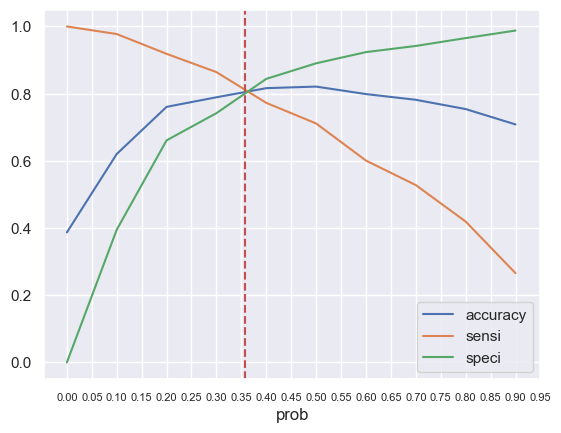

In [134]:
# Plotting accuracy, sensitivity and specificity for various probabilities:-


#plt.figure(figsize=(20,5))
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.xticks(np.arange(0,1,step=0.05),size=8)
plt.axvline(x=0.358, color='r', linestyle='--') # additing axline

plt.show()

#### From the curve above, it seems that  0.358 is optimal cutoff point to take .

In [135]:
# Calculating 'final_predicted' based on 'Converted_Prob' using 0.358 cutoff point:-

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.358 else 0)

In [136]:
# Dropping the unnecessary columns:-

y_train_pred_final.drop([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],axis = 1, inplace = True) 

In [137]:
#Displaying the head:-

y_train_pred_final.head() 

Converted  Converted_Prob  Prospect ID  final_predicted
0          0        0.052032         6490                0
1          1        0.364916         4026                1
2          1        0.473847         6453                1
3          1        0.152922         8949                0
4          0        0.305573         6467                0

### Assigning lead score to the leads based to prediction

In [138]:
# Assigning the 'Lead_Score' based on 'Converted_Prob' :-

y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_Prob.map( lambda x: round(x*100))

In [139]:
# Selecting only important columns and displaying head of dataframe:-

y_train_pred_final[['Converted','Converted_Prob','Prospect ID','final_predicted','Lead_Score']].head()

Converted  Converted_Prob  Prospect ID  final_predicted  Lead_Score
0          0        0.052032         6490                0           5
1          1        0.364916         4026                1          36
2          1        0.473847         6453                1          47
3          1        0.152922         8949                0          15
4          0        0.305573         6467                0          31

## Step 9:Model Evaluation

### Confusion Matrix 

In [140]:
#Importing 'metrics' library:-

from sklearn import metrics

# Confusion matrix:-

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
print(confusion)

[[3206  723]
 [ 496 1984]]


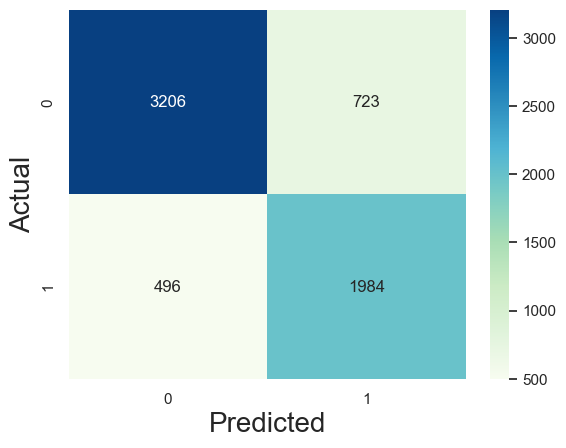

In [143]:
from sklearn.metrics import confusion_matrix


# Plotting confusion matrix:-
sns.heatmap(confusion, annot=True,fmt='g',cmap='GnBu')
plt.xlabel('Predicted',fontsize=20)
plt.ylabel('Actual',fontsize=20)
plt.show()


In [144]:
# Actual/Predicted     not_converted   converted
        # not_converted        3206          723
        # converted            496          1984 

In [145]:
# Check the overall accuracy:-

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8097987205492276

In [146]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [147]:
# Checking the sensitivity of our logistic regression model:-

TP / float(TP+FN)

0.8

In [148]:
# Calculating specificity:-

TN / float(TN+FP)

0.8159837108679053

In [149]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert:-

print(FP/ float(TN+FP))

0.18401628913209467


In [150]:
# positive predictive value :-

print (TP / float(TP+FP))

0.7329146656815663


In [151]:
# Negative predictive value:-

print (TN / float(TN+ FN))

0.8660183684494868


## Precision and Recall

##### Precision
TP / TP + FP

In [153]:
# Calculating 'Recall' :-

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8

Using sklearn utilities for the same

In [154]:
#Importing 'precision_score' and 'recall_score':_

from sklearn.metrics import precision_score, recall_score

In [155]:
# Calculating Precision value:-

precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7329146656815663

In [156]:
#Calculating Recall value:-

recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8

### Observation

We have the following values for the Train Data:

- Accuracy :    80%
- Sensitivity : 80%
- Specificity : 81%
- Pricision:    72%
- Recall:       80%

## Step 10: Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [159]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [160]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

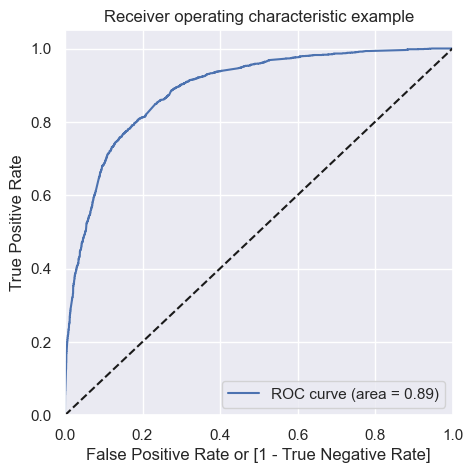

In [161]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

### Observation

We are getting a good value of 0.89 indicating a good predictive model.As ROC Curve should be a value close to 1. 

### Precision and recall tradeoff

In [162]:
# Importing required library for 'precision_recall_curve' :-

from sklearn.metrics import precision_recall_curve

In [163]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

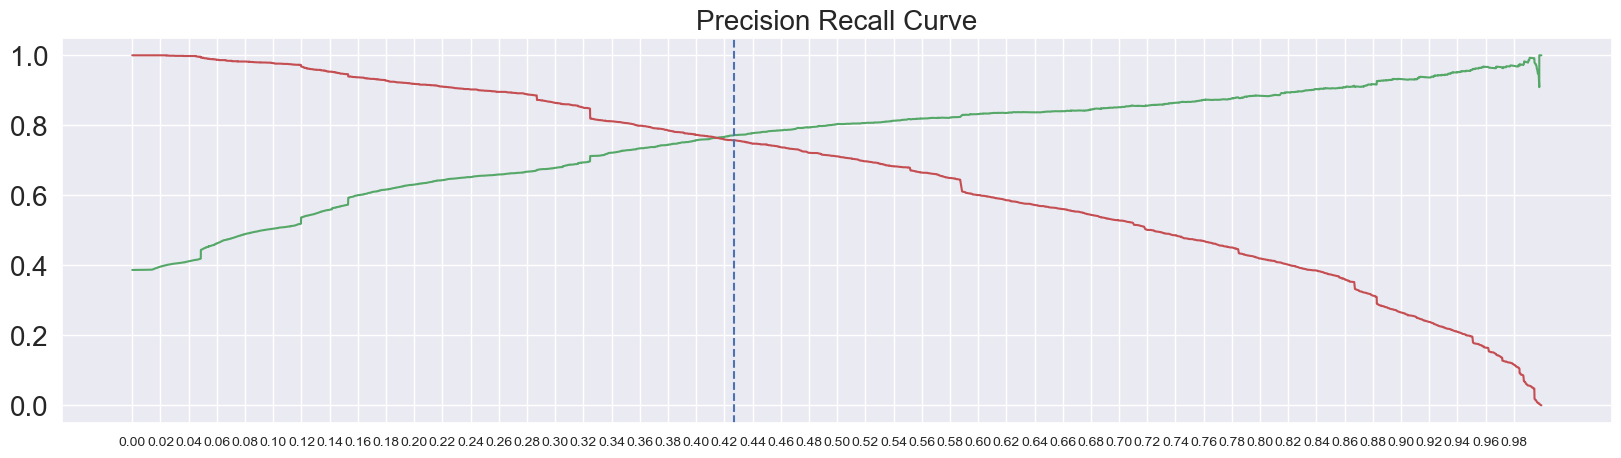

In [164]:
plt.figure(figsize=(20,5))
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.title('Precision Recall Curve',fontsize=20)
plt.axvline(x=0.427, color='b', linestyle='--') # additing axline
plt.xticks(np.arange(0,1,step=0.02),size=10)
plt.yticks(size=20)

plt.show()

### Observation
From above above 'precision_recall_curve' we can see that cutoff point is 0.427.

### Now using this threshold value from 'Precision Recall Tradeoff Curve' for Data Evaluation

In [166]:
# plotting the Train dataset again with 0.427 as cutoff:-

y_train_pred_final['final_predicted_2'] = y_train_pred_final['Converted_Prob'].map( lambda x: 1 if x > 0.427 else 0)
y_train_pred_final.head() # Displaying head 

Converted  Converted_Prob  Prospect ID  final_predicted  Lead_Score  final_predicted_2
0          0        0.052032         6490                0           5                  0
1          1        0.364916         4026                1          36                  0
2          1        0.473847         6453                1          47                  1
3          1        0.152922         8949                0          15                  0
4          0        0.305573         6467                0          31                  0

In [167]:
# Confusion matrix:-

confusion_2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted_2)
print(confusion_2)

[[3374  555]
 [ 602 1878]]


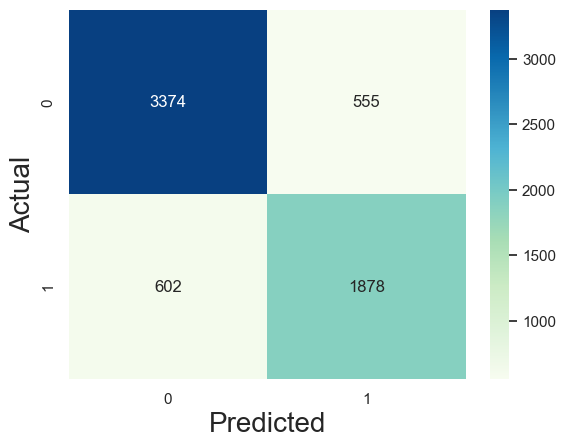

In [168]:
# Plotting confusion matrix:-
sns.heatmap(confusion_2, annot=True,fmt='g',cmap='GnBu')
plt.xlabel('Predicted',fontsize=20)
plt.ylabel('Actual',fontsize=20)
plt.show()

In [169]:
# Check the overall accuracy:-

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted_2)

0.8194726166328601

In [170]:
TP = confusion_2[1,1] # true positive 
TN = confusion_2[0,0] # true negatives
FP = confusion_2[0,1] # false positives
FN = confusion_2[1,0] # false negatives

In [171]:
# Checking the sensitivity of our logistic regression model:-

TP / float(TP+FN)

0.757258064516129

In [172]:
# Calculating specificity:-

TN / float(TN+FP)

0.8587426826164418

In [173]:
# positive predictive value :-

print (TP / float(TP+FP))

0.7718865598027127


In [174]:
# Negative predictive value:-

print (TN / float(TN+ FN))

0.8485915492957746


In [175]:
# Pricision:-

confusion_2[1,1]/(confusion_2[0,1]+confusion_2[1,1])

0.7718865598027127

In [176]:
# Calculating 'Recall' :-

confusion_2[1,1]/(confusion_2[1,0]+confusion_2[1,1])

0.757258064516129

### Observation
By using the Precision - Recall trade off curve cut off point True Positive number has decrease and True Negative number has increase

Thus, we cannot use Precision-Recall trade-off method as it reduced True Positive so 'Recall'/'sensitivity' decreased for this point We have to increase Sensitivity Recall value to increase True Positives. Thus we will use 0.358 as optimal cutoff point.

## Step 11: Making predictions on the test set

#### Applying scaling on test data 

In [177]:
# Applying 'transform' to scale the 'test' data set:-

X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [178]:
# Predicting using values used by the final model i.e. logm3:-

test_col = X_train_sm3.columns

X_test=X_test[test_col[1:]]
# Adding constant variable to test dataframe:-
X_test = sm.add_constant(X_test)

X_test.info() #Displaying info about columns

<class 'pandas.core.frame.DataFrame'>
Index: 2748 entries, 7359 to 4744
Data columns (total 14 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   const                                       2748 non-null   float64
 1   Lead Origin_Landing Page Submission         2748 non-null   int32  
 2   Lead Origin_Lead Add Form                   2748 non-null   int32  
 3   Lead Origin_Lead Import                     2748 non-null   int32  
 4   Lead Source_Facebook                        2748 non-null   int32  
 5   Lead Source_Olark Chat                      2748 non-null   int32  
 6   Lead Source_Welingak Website                2748 non-null   int32  
 7   Last Activity_Email Opened                  2748 non-null   int32  
 8   Last Activity_SMS Sent                      2748 non-null   int32  
 9   What is your current occupation_Other       2748 non-null   int32  
 10  What is your c

#### Making Predictions on the X_test dataset using the final model

In [179]:
# Predicting on test data set using final model :-

y_test_pred = logm3.predict(X_test)

In [180]:
# Checking top 10 rows:-

y_test_pred[:10]

7359    0.452297
2201    0.059722
2473    0.981354
8388    0.059490
2949    0.070774
8144    0.053239
8443    0.551574
290     0.048606
8626    0.330178
5709    0.248346
dtype: float64

In [181]:
# Converting y_test_pred to a dataframe :-

y_pred_1 = pd.DataFrame(y_test_pred)

In [182]:
# Let's see the head
y_pred_1.head()

0
7359  0.452297
2201  0.059722
2473  0.981354
8388  0.059490
2949  0.070774

In [183]:
# Converting y_test to dataframe:-

y_test_df = pd.DataFrame(y_test)

In [184]:
# Putting 'Prospect ID' to index:-

y_test_df['Prospect ID'] = y_test_df.index

In [185]:
# Removing index for both dataframes to append them side by side :-

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [186]:
# Appending y_test_df and y_pred_1:-

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [187]:
# Displaying head of 'y_pred_final' :-

y_pred_final.head()

Converted  Prospect ID         0
0          0         7359  0.452297
1          0         2201  0.059722
2          1         2473  0.981354
3          0         8388  0.059490
4          0         2949  0.070774

In [188]:
# Renaming the column '0' as 'Converted_Prob':-

y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [189]:
# Rearranging the columns:-

y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_Prob']]

In [190]:
# Let's see the head of y_pred_final:-

y_pred_final.head()

Prospect ID  Converted  Converted_Prob
0         7359          0        0.452297
1         2201          0        0.059722
2         2473          1        0.981354
3         8388          0        0.059490
4         2949          0        0.070774

In [191]:
#Assigning 'Lead Score' to dataframe 'y_pred_final':-

y_pred_final['Lead_Score'] = y_pred_final.Converted_Prob.map( lambda x: round(x*100))

In [192]:

y_pred_final.head()

Prospect ID  Converted  Converted_Prob  Lead_Score
0         7359          0        0.452297          45
1         2201          0        0.059722           6
2         2473          1        0.981354          98
3         8388          0        0.059490           6
4         2949          0        0.070774           7

#### Using Cutoff point of 0.357 from Sentivity - Specificity - Accuracy plot cut-off point

In [193]:
# Calculating 'final_Predicted' based on 'Converted_Prob' for cutoff point 0.357:-

y_pred_final['final_Predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.357 else 0)

In [194]:
# Displaying the head of 'y_pred_final' dataframe:-

y_pred_final.head()

Prospect ID  Converted  Converted_Prob  Lead_Score  final_Predicted
0         7359          0        0.452297          45                1
1         2201          0        0.059722           6                0
2         2473          1        0.981354          98                1
3         8388          0        0.059490           6                0
4         2949          0        0.070774           7                0

### Test model evaluation

In [195]:
# Checking the overall accuracy:-

metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.7998544395924309

#### Confusion Matrix

In [196]:
# Calculating confusion matrix for test data:-

confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1368,  335],
       [ 215,  830]], dtype=int64)

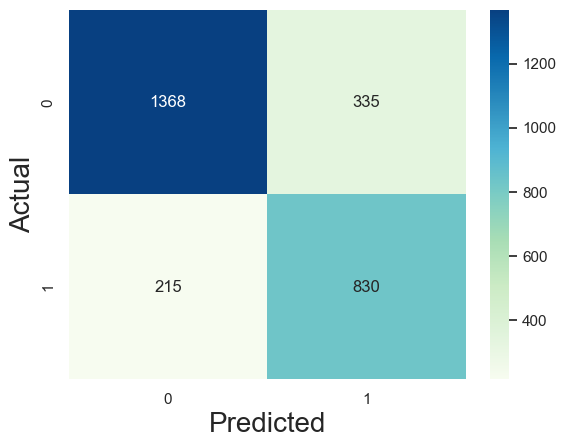

In [197]:
# Plotting confusion matrix:-
sns.heatmap(confusion2, annot=True,fmt='g',cmap='GnBu')
plt.xlabel('Predicted',fontsize=20)
plt.ylabel('Actual',fontsize=20)
plt.show()

In [198]:
    TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [199]:
# Let's see the sensitivity of our logistic regression model:-

TP / float(TP+FN)

0.7942583732057417

In [200]:
# Let us calculate specificity:-

TN / float(TN+FP)

0.8032883147386964

In [201]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert:-

print(FP/ float(TN+FP))

0.1967116852613036


In [202]:
# positive predictive value :-

print (TP / float(TP+FP))

0.7124463519313304


In [203]:
# Negative predictive value:-

print (TN / float(TN+ FN))

0.8641819330385344


### Precision and Recall

In [204]:
# Calculating 'precision_score':-

precision_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.7124463519313304

In [205]:
    #Calculating 'recall_score':-

recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.7942583732057417

### Observation

The sensitivity value for test data is 80% while for train data is also 80% . The accuracy values is ~ 80%. Which shows that model is performing well for test data set also.

### Determining top feature based on final model (logm5)

In [206]:
# Displaying parameters obtained by final model 'logm5':-

pd.options.display.float_format = '{:.2f}'.format # Setting format option
logm3.params[1:]

Lead Origin_Landing Page Submission           -0.99
Lead Origin_Lead Add Form                      2.92
Lead Origin_Lead Import                       19.30
Lead Source_Facebook                         -19.38
Lead Source_Olark Chat                         1.26
Lead Source_Welingak Website                   2.30
Last Activity_Email Opened                     0.98
Last Activity_SMS Sent                         2.06
What is your current occupation_Other         -3.51
What is your current occupation_Student       -2.34
What is your current occupation_Unemployed    -2.25
Specialization_Other                          -0.94
Total Time Spent on Website                    1.13
dtype: float64

In [207]:
#Getting a relative coeffient value for all the features wrt the feature with the highest coefficient:-

top_feature = logm3.params[1:]
top_feature = 100.0 * (top_feature / top_feature.max())
top_feature

Lead Origin_Landing Page Submission            -5.15
Lead Origin_Lead Add Form                      15.15
Lead Origin_Lead Import                       100.00
Lead Source_Facebook                         -100.40
Lead Source_Olark Chat                          6.52
Lead Source_Welingak Website                   11.89
Last Activity_Email Opened                      5.07
Last Activity_SMS Sent                         10.69
What is your current occupation_Other         -18.19
What is your current occupation_Student       -12.11
What is your current occupation_Unemployed    -11.65
Specialization_Other                           -4.87
Total Time Spent on Website                     5.83
dtype: float64

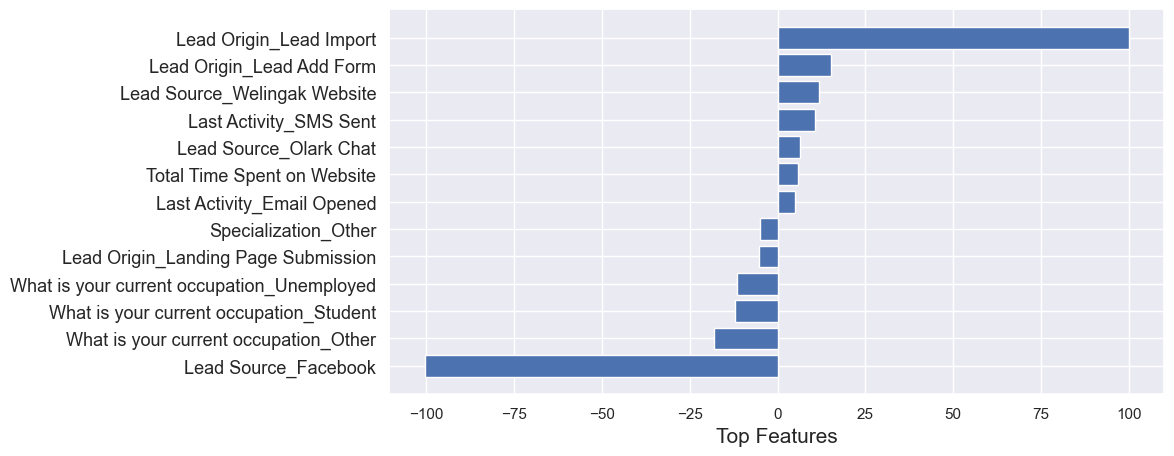

In [208]:
# Plotting the feature variables based on their relative importance:-

top_feature_sort = np.argsort(top_feature,kind='quicksort',order='list of str')

pos = np.arange(top_feature_sort.shape[0]) + .5

fig1 = plt.figure(figsize=(10,5))
ax = fig1.add_subplot(1, 1, 1)
ax.barh(pos, top_feature[top_feature_sort])
ax.set_yticks(pos)
ax.set_yticklabels(np.array(X_train_new.columns)[top_feature_sort], fontsize=13)
ax.set_xlabel('Top Features', fontsize=15)
plt.show()

### Final model line equation :-

****Converted = 0.261843 + 3.15 X Lead Source_Welingak Website + 2.98 X Lead Origin_Lead Add Form  + 2.39 X What is your current occupation_Working Professional + 1.45 X Last Activity_Unsubscribed + 1.38 X Last Activity_SMS Sent + 1.17 X Lead Source_Olark Chat + 1.07 X Total Time Spent on Website - 0.87 X Lead Origin_Landing Page Submission - 0.87 X Specialization_Other - 0.96 X Specialization_Hospitality Management - 1.19 X What is your current occupation_Other - 1.22 X Last Activity_Olark Chat Conversation****

### Final Observation

Evaluation Metrics for the train Dataset:-
- Accuracy :0.80
- Sensitivity:~0.80
- Specificity:0.81
- Precision: 0.72
- Recall:    0.80

Evaluation Metrics for the test Dataset:-
- Accuracy : 0.80
- Sensitivity: ~ 0.80
- Specificity: 0.80
- Precision: 0.72
- Recall: 0.80